In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


In [ ]:
df = pd.read_csv('Training Data.csv')

df.head()

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [ ]:
#Tiruchirappalli[10]	-> Tiruchirappalli (Feature apakah ini?) Biarkan saja ges
#ketika model kurang optimal -> maka baru dilakukan feature transformation (harusnya begitu ges)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


**Jumlah value yang ada number atau simbol di kolom CITY dan STATE**

In [ ]:
count = (df['CITY'].str.contains(r'\d') | df['CITY'].str.contains(r'[!@#$%^&*()]')).sum()
print('Value contains numbering or symbols in CITY column : ', count)

Value contains numbering or symbols in CITY column :  23938


In [ ]:
count = (df['STATE'].str.contains(r'\d') | df['STATE'].str.contains(r'[!@#$%^&*()]')).sum()
print('Value contains numbering or symbols in CITY column : ', count)

Value contains numbering or symbols in CITY column :  743


**Pengecekan value space only tiap kolom**

In [ ]:
# Convert integer values to strings
df2 = df.applymap(str)

# Count values that contain only spaces in every column
counts = df2.applymap(lambda x: x.count(' ') == len(x)).sum()

print(counts)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


# EDA versi 1

In [ ]:
cats = df.select_dtypes(include=['object']).columns
nums = df.select_dtypes(include=['number']).columns

In [ ]:
df[cats].describe()

Married/Single House_Ownership Car_Ownership Profession           CITY  \
count          252000          252000        252000     252000         252000   
unique              2               3             2         51            317   
top            single          rented            no  Physician  Vijayanagaram   
freq           226272          231898        176000       5957           1259   

                STATE  
count          252000  
unique             29  
top     Uttar_Pradesh  
freq            28400

In [ ]:
df[nums].describe()

Id        Income            Age     Experience  \
count  252000.000000  2.520000e+05  252000.000000  252000.000000   
mean   126000.500000  4.997117e+06      49.954071      10.084437   
std     72746.278255  2.878311e+06      17.063855       6.002590   
min         1.000000  1.031000e+04      21.000000       0.000000   
25%     63000.750000  2.503015e+06      35.000000       5.000000   
50%    126000.500000  5.000694e+06      50.000000      10.000000   
75%    189000.250000  7.477502e+06      65.000000      15.000000   
max    252000.000000  9.999938e+06      79.000000      20.000000   

       CURRENT_JOB_YRS  CURRENT_HOUSE_YRS      Risk_Flag  
count    252000.000000      252000.000000  252000.000000  
mean          6.333877          11.997794       0.123000  
std           3.647053           1.399037       0.328438  
min           0.000000          10.000000       0.000000  
25%           3.000000          11.000000       0.000000  
50%           6.000000          12.000000       0.000000  
75%           9.000000          13.000000       0.000000  
max          14.000000          14.000000       1.000000

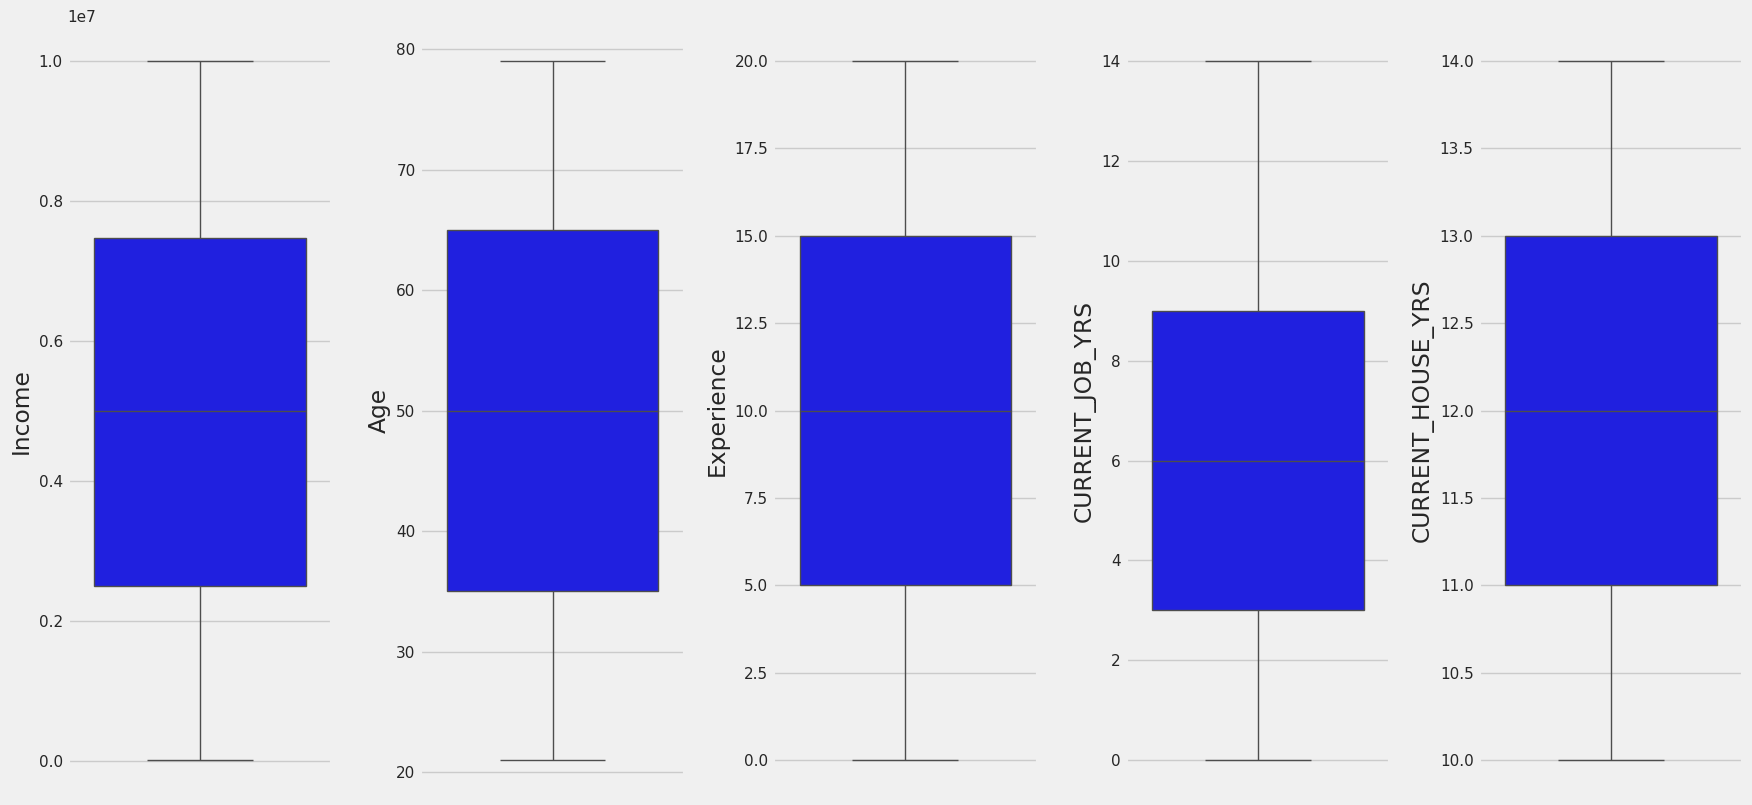

In [ ]:
for i in range(1, len(nums)-1):
    plt.subplot(1, len(nums)-1, i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

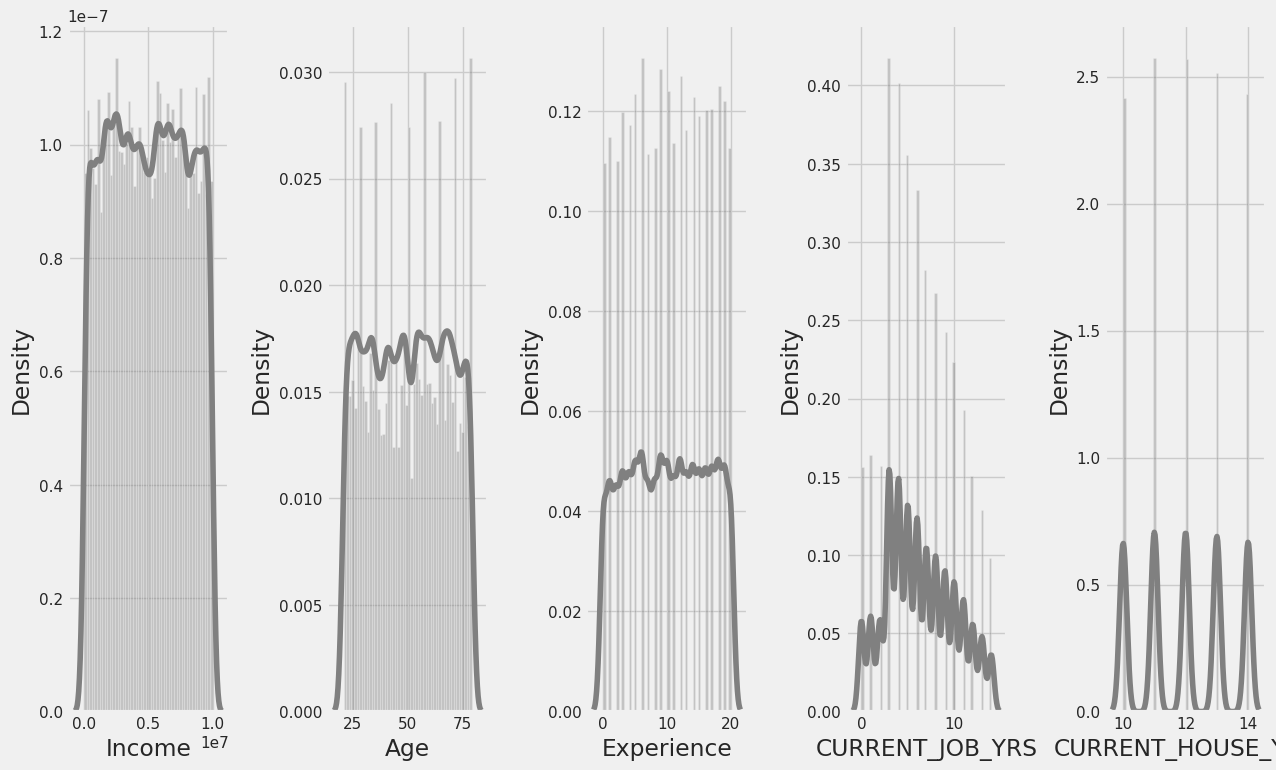

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(1, len(nums)-1):
    plt.subplot(2, len(nums)-1, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

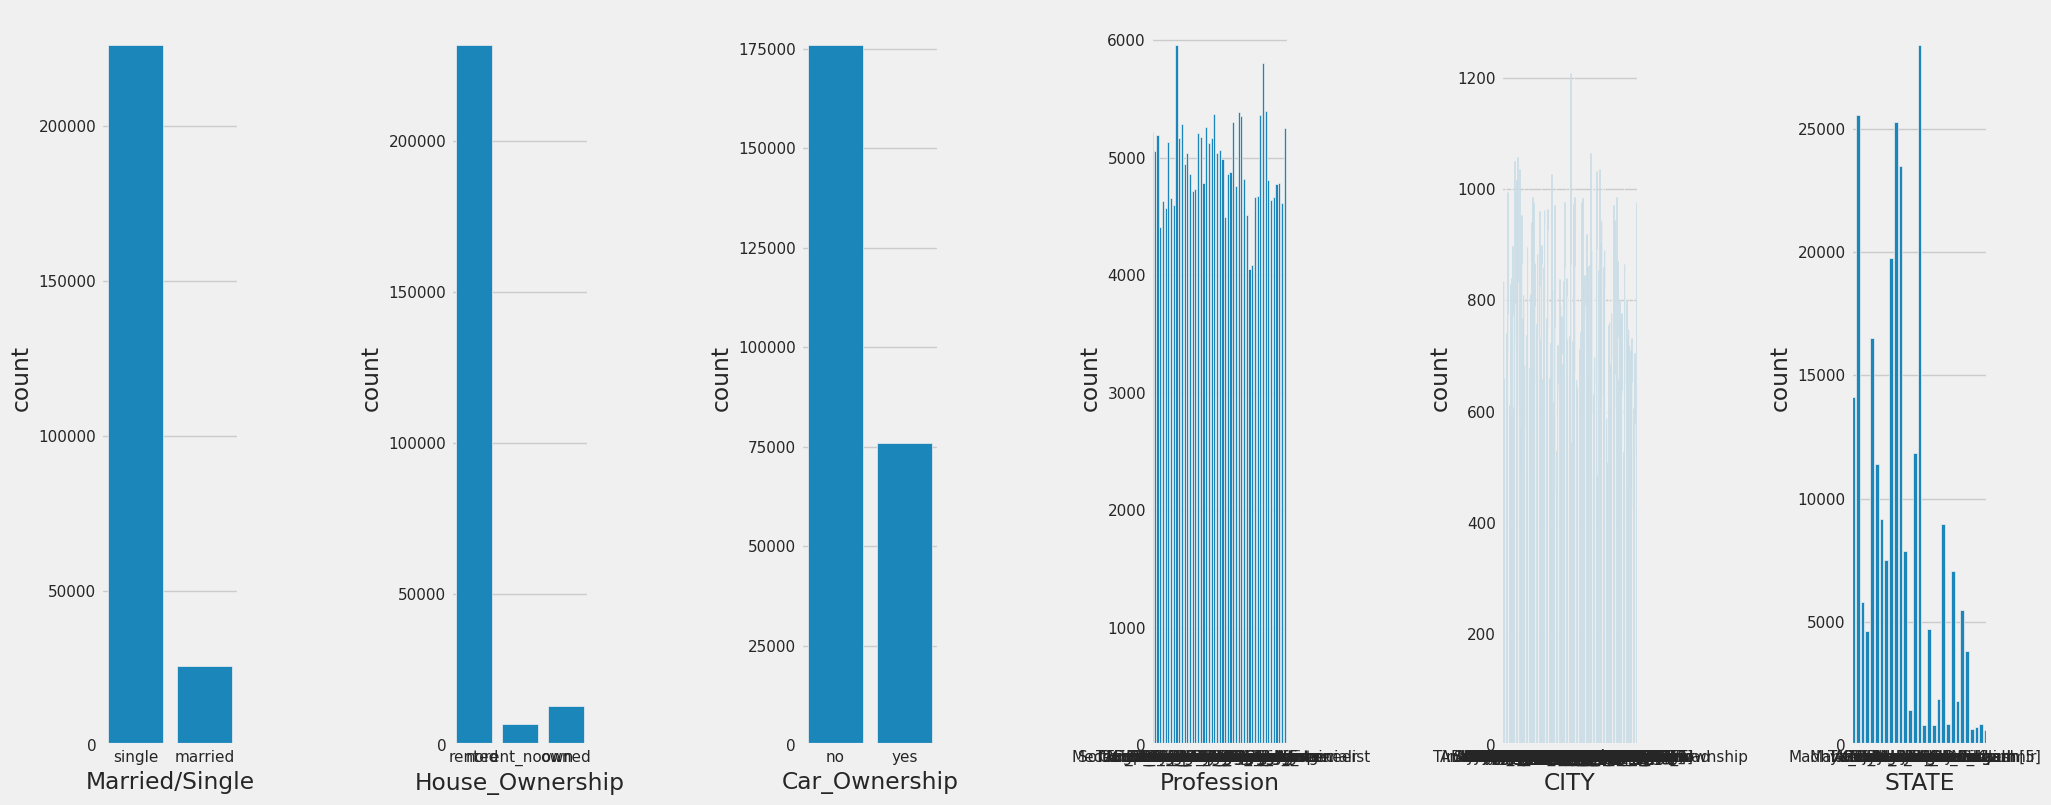

In [ ]:
for i in range(0, len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(x=df[cats[i]])
  plt.tight_layout()

<Axes: >

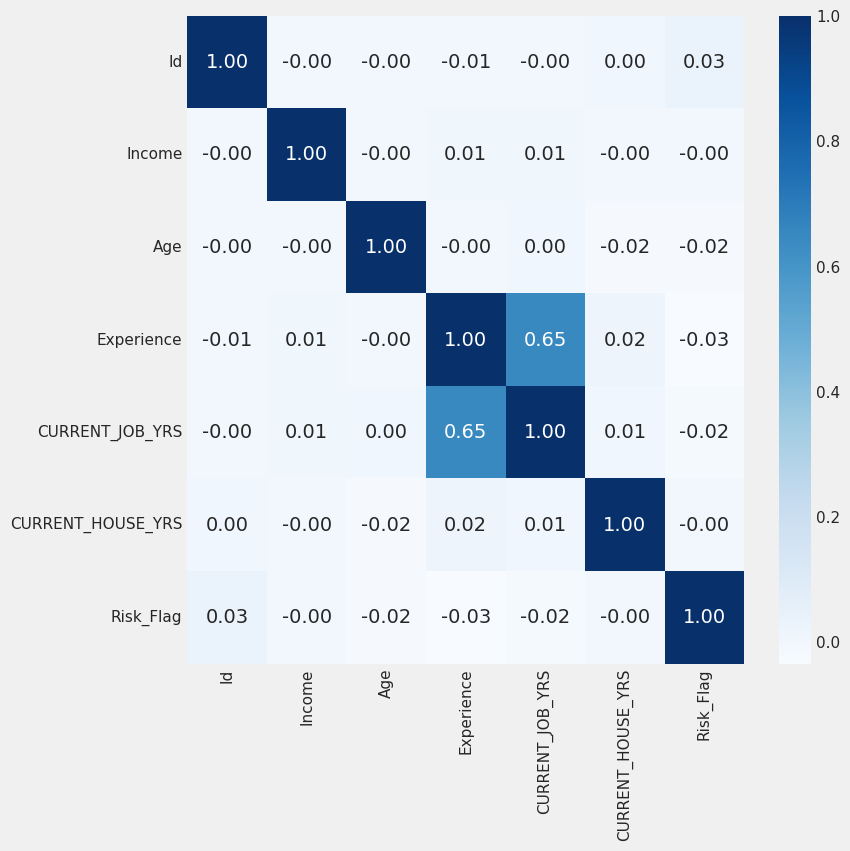

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 800x800 with 0 Axes>

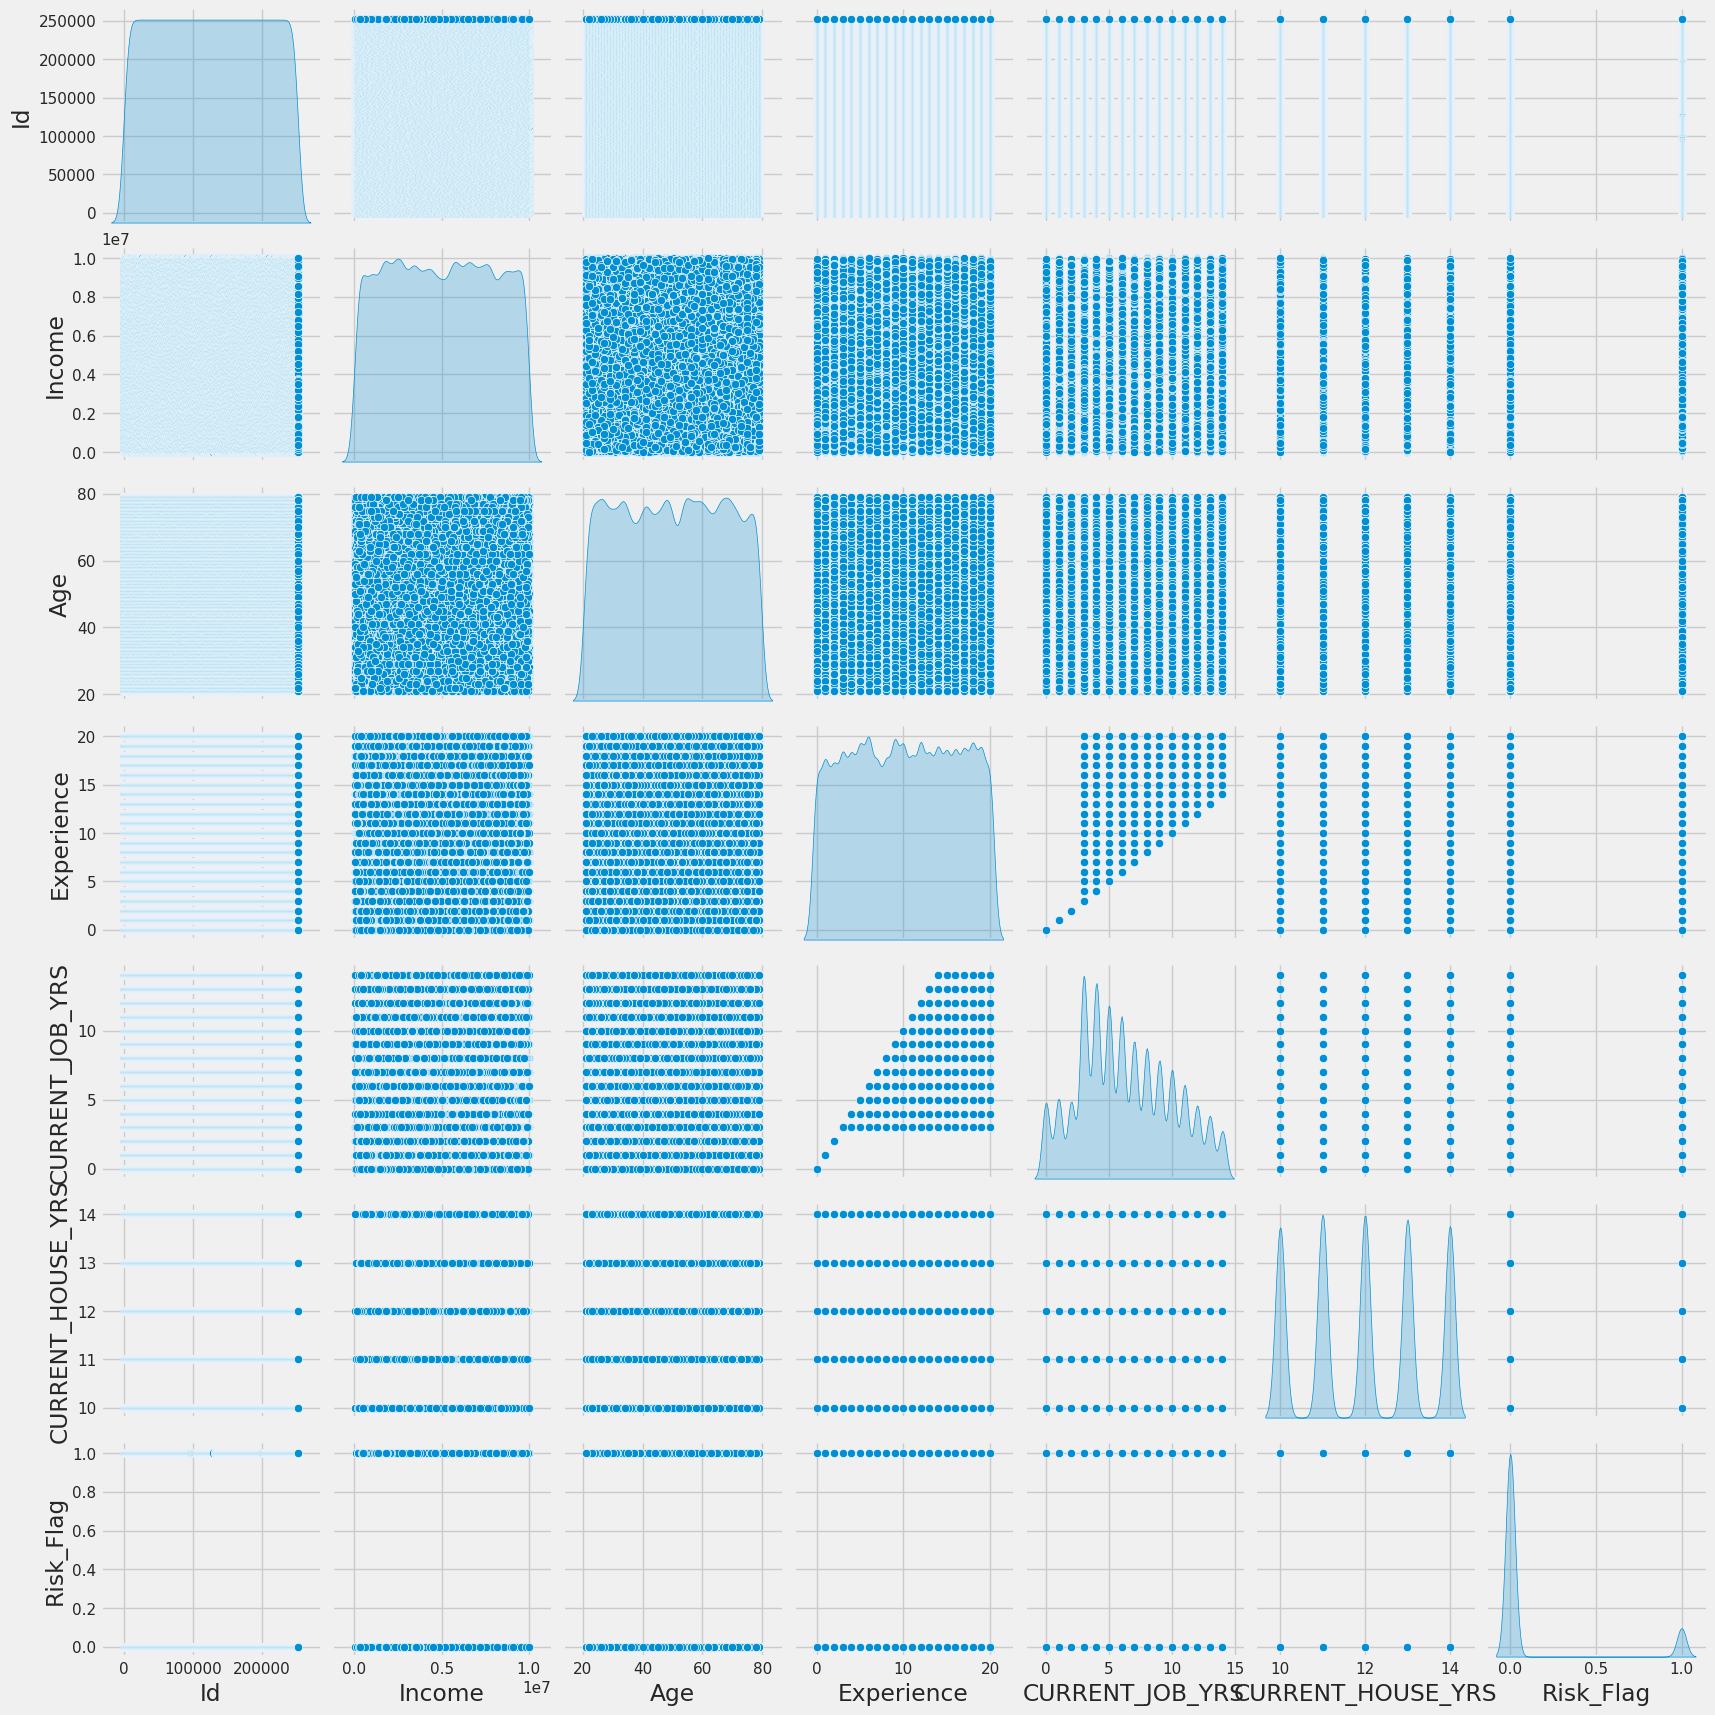

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, diag_kind='kde')

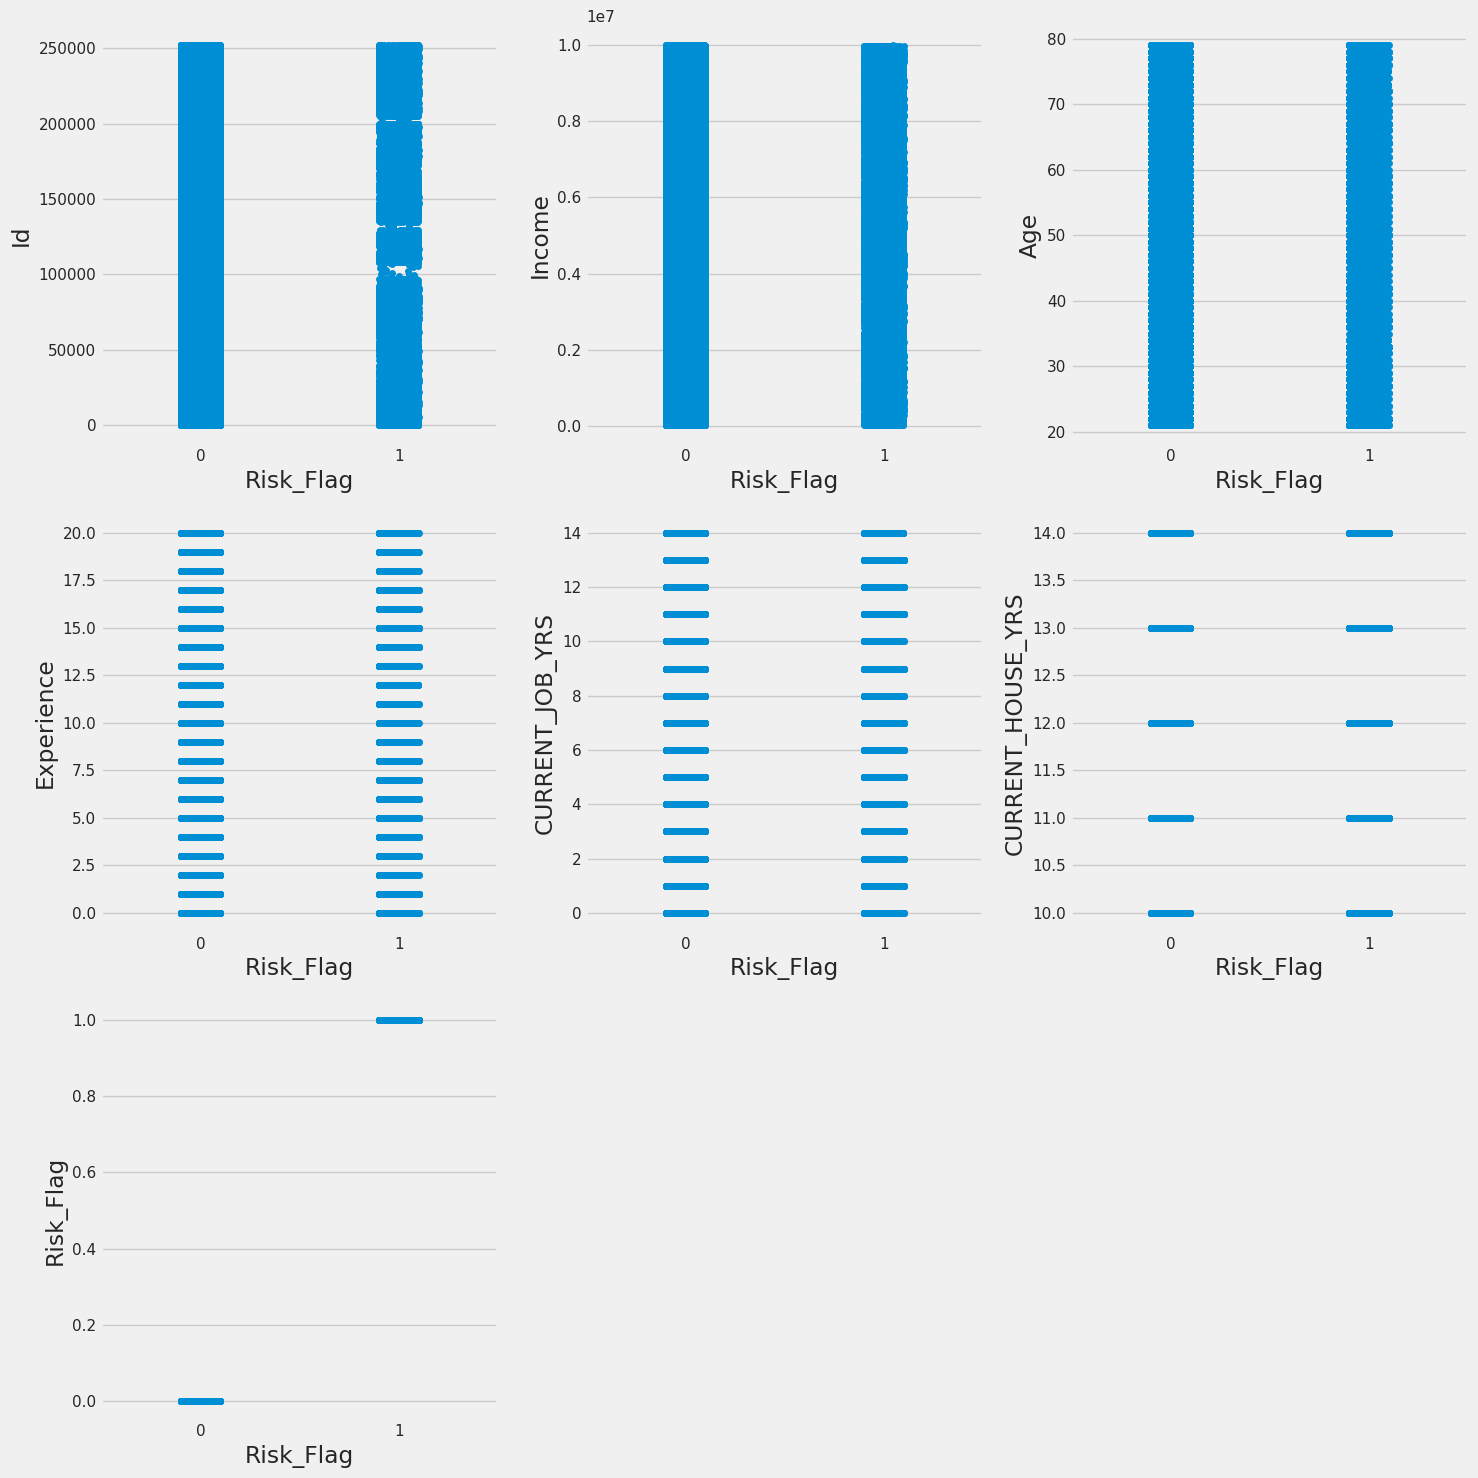

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='Risk_Flag', y=nums[i])
    plt.tight_layout()

# EDA versi 2

In [ ]:
cats = ['Id','Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Risk_Flag']
df[cats] = df[cats].astype({'Id': 'object', 'Risk_Flag': 'object'})
nums = df.select_dtypes(include=['number']).columns

In [ ]:
df[cats].head()

Id Married/Single House_Ownership Car_Ownership           Profession  \
0  1         single          rented            no  Mechanical_engineer   
1  2         single          rented            no   Software_Developer   
2  3        married          rented            no     Technical_writer   
3  4         single          rented           yes   Software_Developer   
4  5         single          rented            no        Civil_servant   

                  CITY           STATE Risk_Flag  
0                 Rewa  Madhya_Pradesh         0  
1             Parbhani     Maharashtra         0  
2            Alappuzha          Kerala         0  
3          Bhubaneswar          Odisha         1  
4  Tiruchirappalli[10]      Tamil_Nadu         1

In [ ]:
df[cats].describe()

Id Married/Single House_Ownership Car_Ownership Profession  \
count   252000         252000          252000        252000     252000   
unique  252000              2               3             2         51   
top          1         single          rented            no  Physician   
freq         1         226272          231898        176000       5957   

                 CITY          STATE  Risk_Flag  
count          252000         252000     252000  
unique            317             29          2  
top     Vijayanagaram  Uttar_Pradesh          0  
freq             1259          28400     221004

In [ ]:
df[nums].describe()

Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.520000e+05  252000.000000  252000.000000    252000.000000   
mean   4.997117e+06      49.954071      10.084437         6.333877   
std    2.878311e+06      17.063855       6.002590         3.647053   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.503015e+06      35.000000       5.000000         3.000000   
50%    5.000694e+06      50.000000      10.000000         6.000000   
75%    7.477502e+06      65.000000      15.000000         9.000000   
max    9.999938e+06      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS  
count      252000.000000  
mean           11.997794  
std             1.399037  
min            10.000000  
25%            11.000000  
50%            12.000000  
75%            13.000000  
max            14.000000

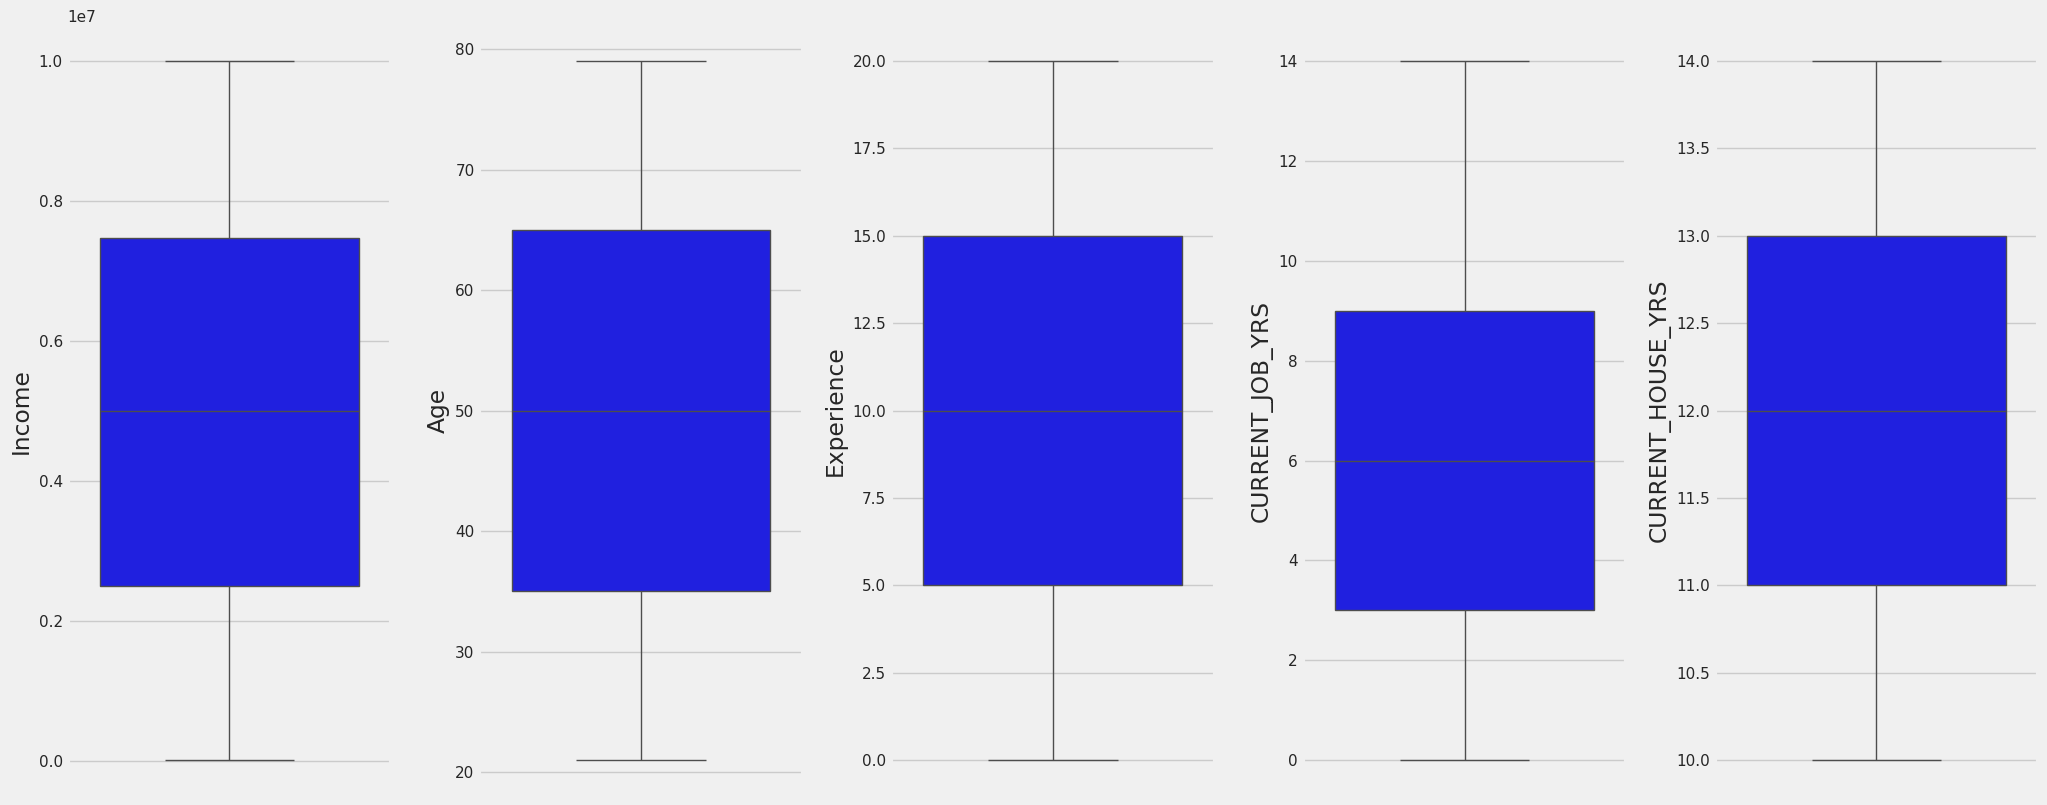

In [ ]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

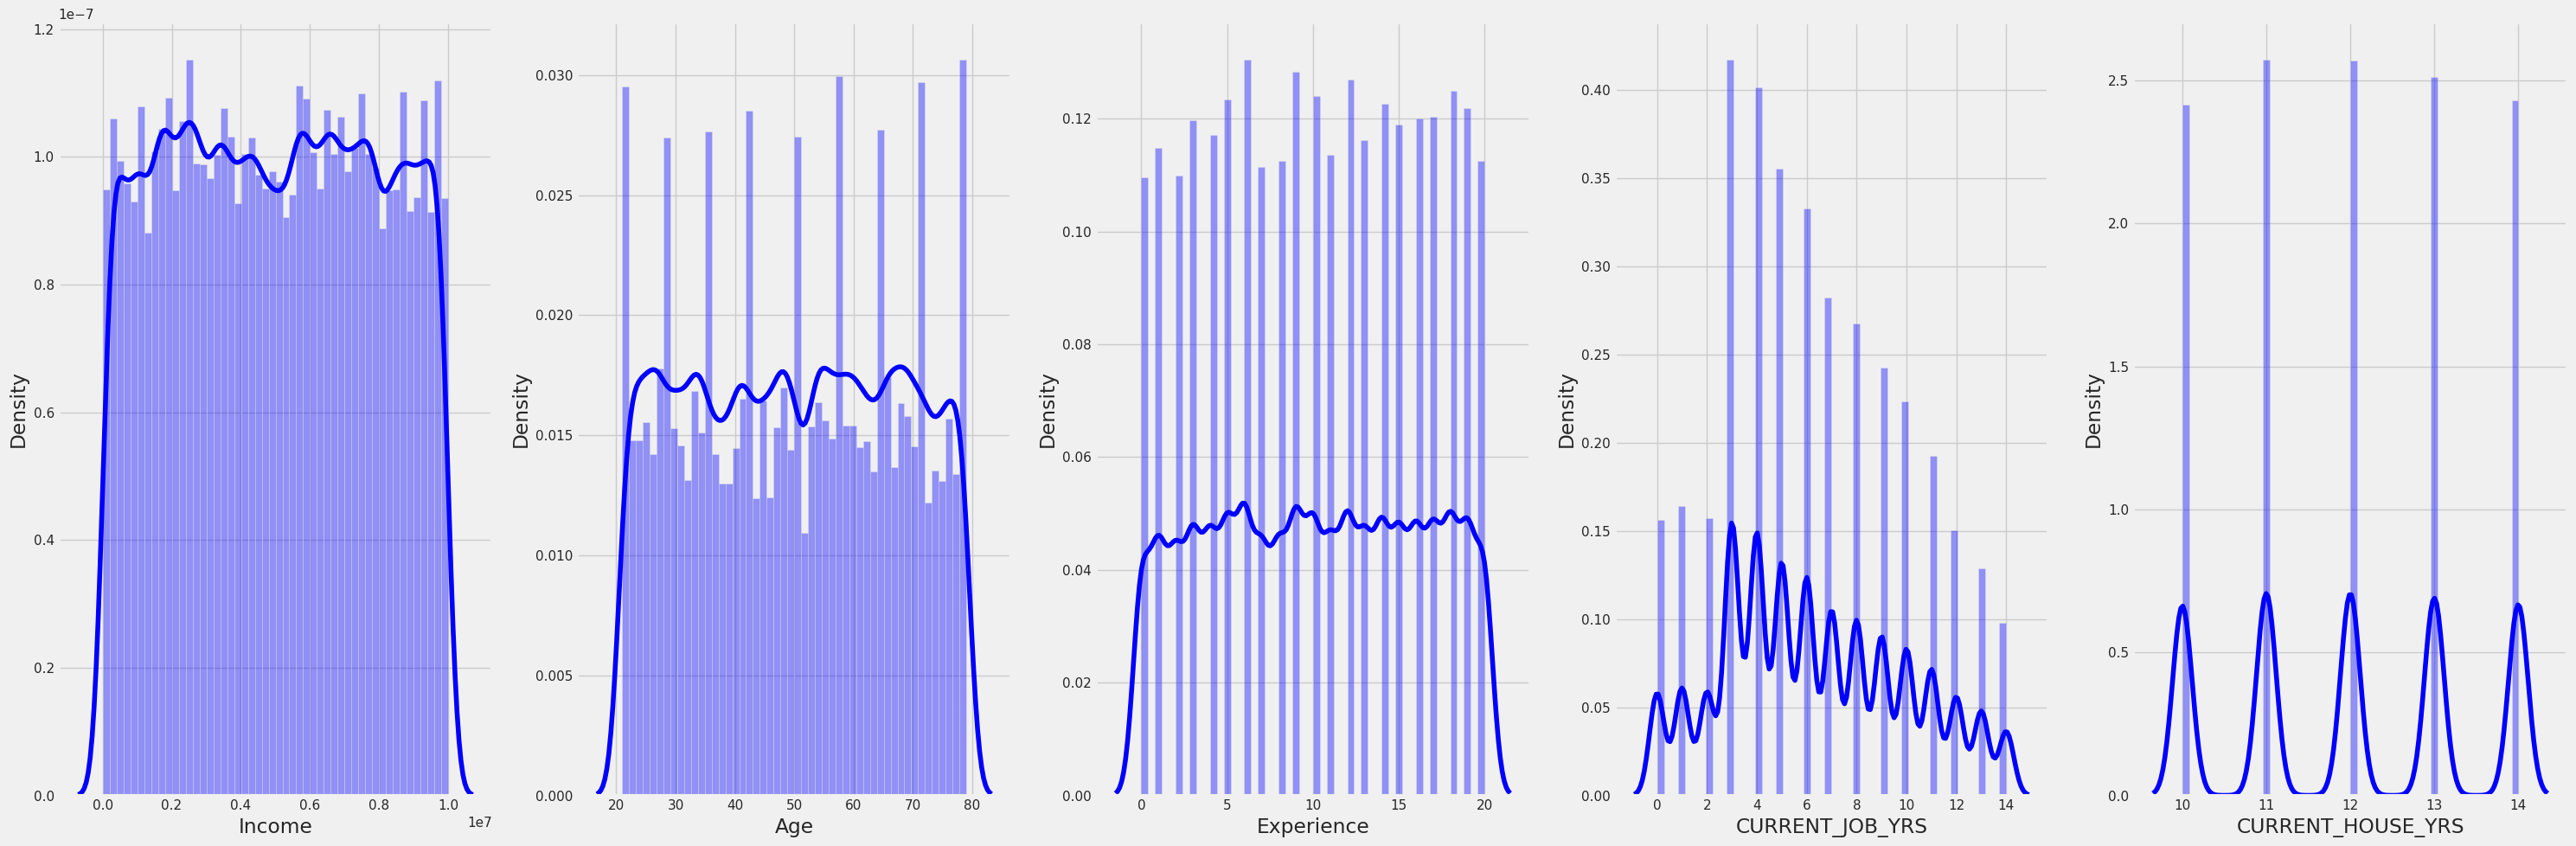

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

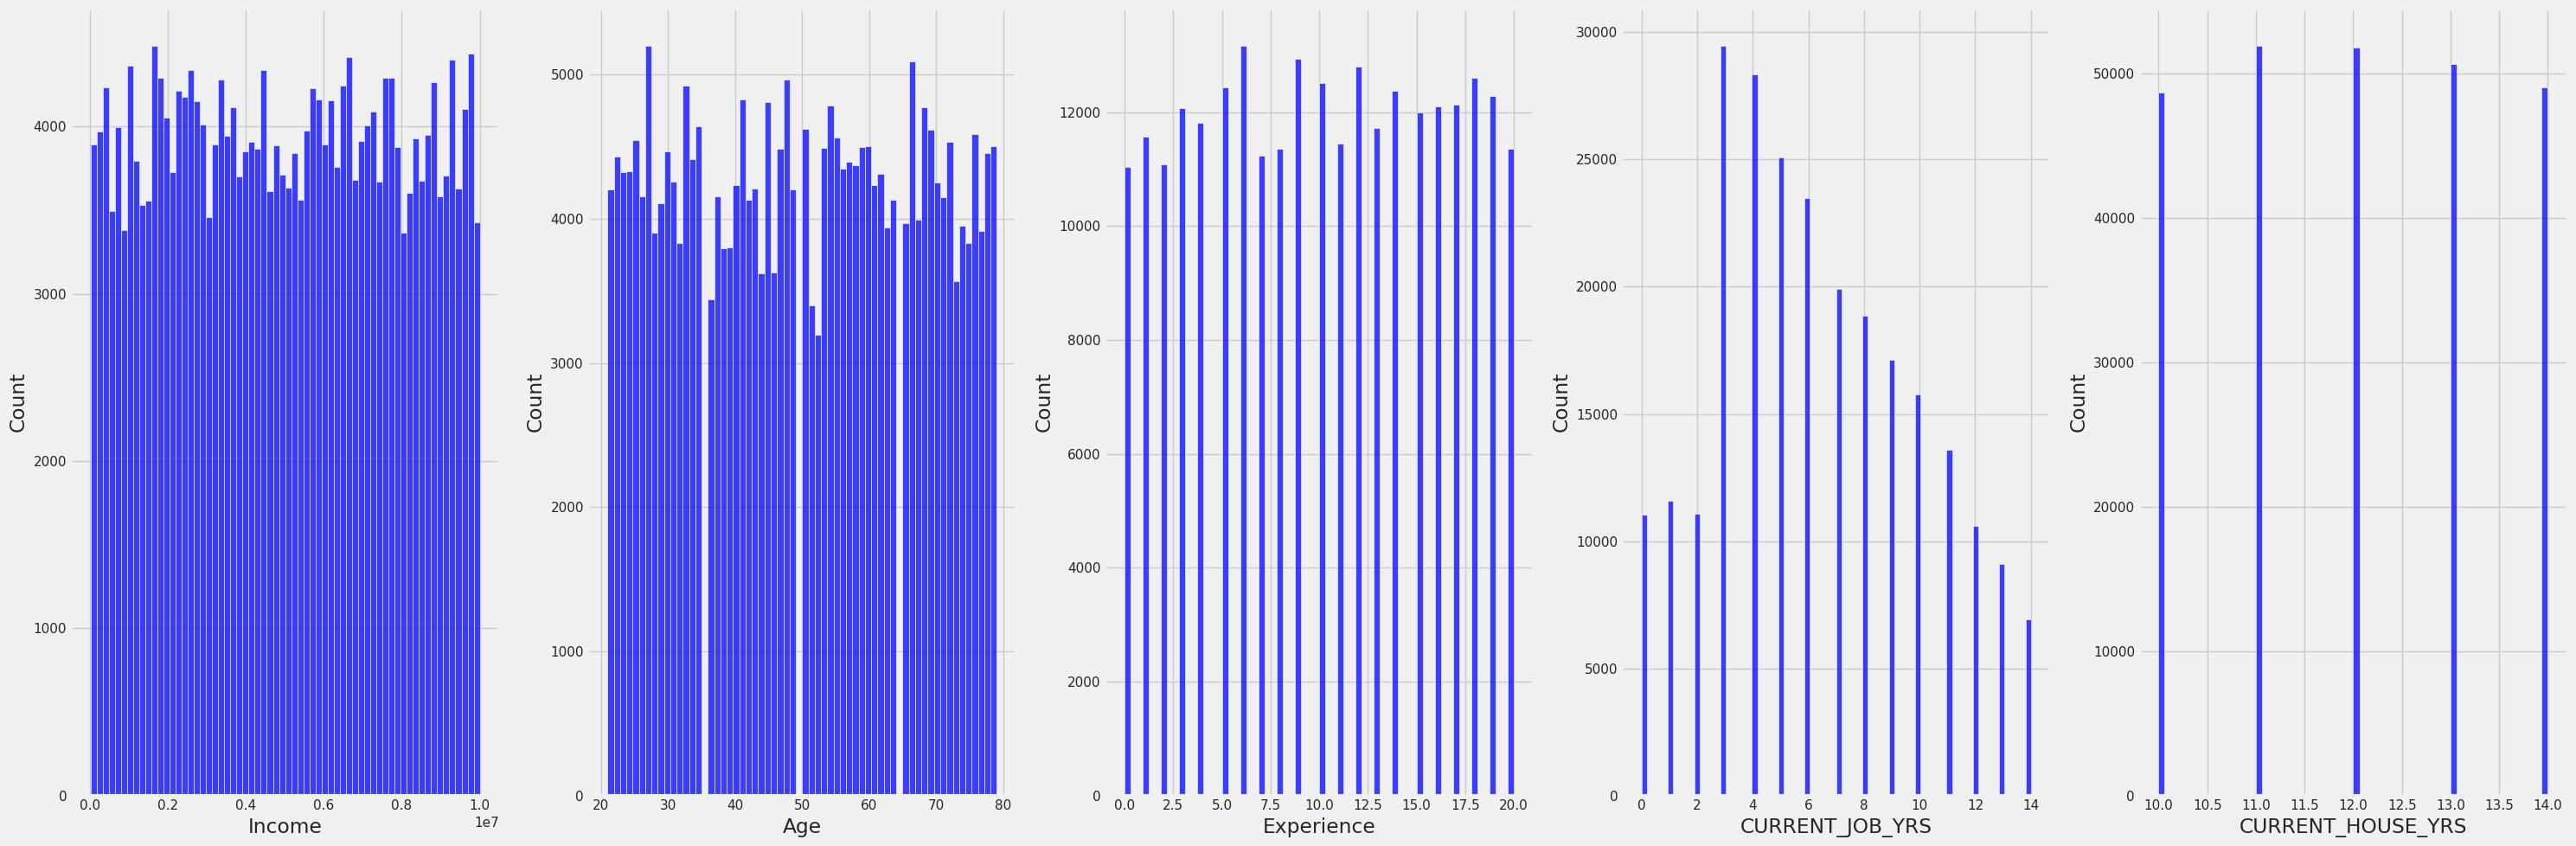

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.histplot(df[nums[i]], color='blue')
    plt.tight_layout()

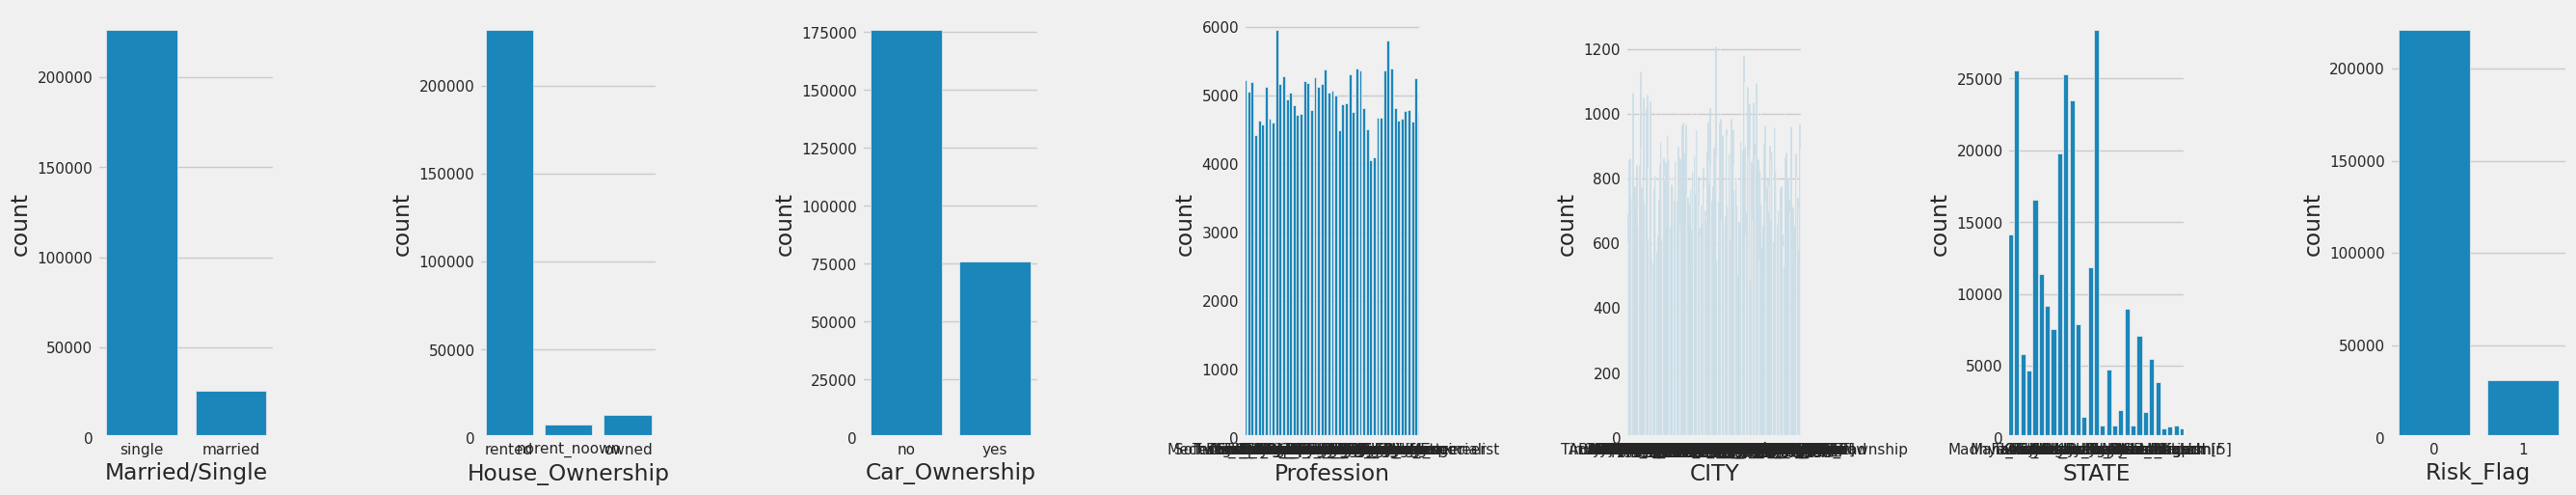

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(1, len(cats)):
  plt.subplot(2, len(cats), i+1)
  sns.countplot(x=df[cats[i]])
  plt.tight_layout()

Pada kolom Married/Single nilai single sebanyak 90% sangat mendominasi jauh dibandingkan Married


Pada kolom House Ownership nilai rented sebanyak 92% sangat mendominasi jauh dibandingkan Own dan norent_noown


Pada kolom Car_Ownership nilai No sebanyak 70% sangat mendominasi dibandingkan Yes


Pada kolom Profession, City, & State memiliki kategori yang variatif

Pada kolom Risk Flag, 0 sangat mendominasi dibandingkan 1


**Risk Flag berdasarkan status**

Text(0.55, 0.02, 'Married/Single')

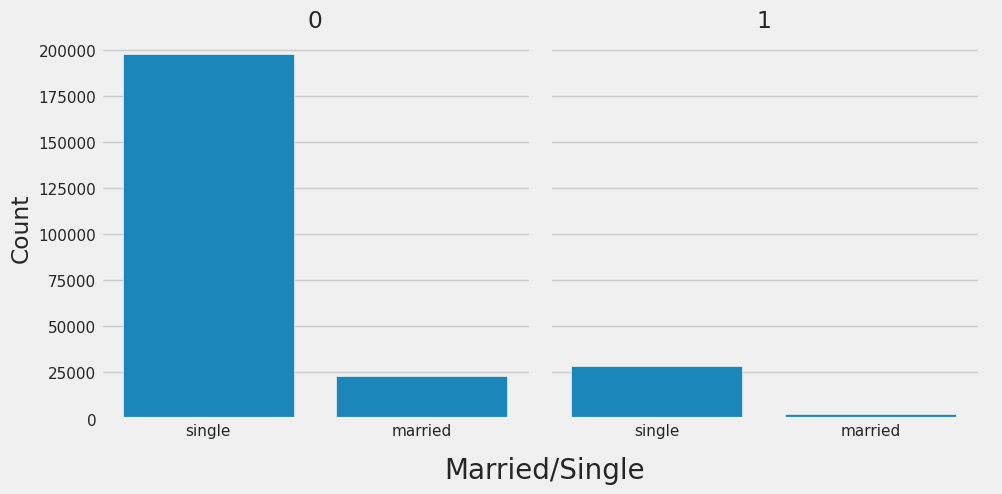

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=5)
g.map(sns.countplot, "Married/Single")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")  # Set x-axis label to empty string
g.fig.text(0.55, 0.02, "Married/Single", ha="center", fontsize=20)

**Risk Flag berdasarkan House Ownership**

Text(0.55, 0.02, 'House Ownership')

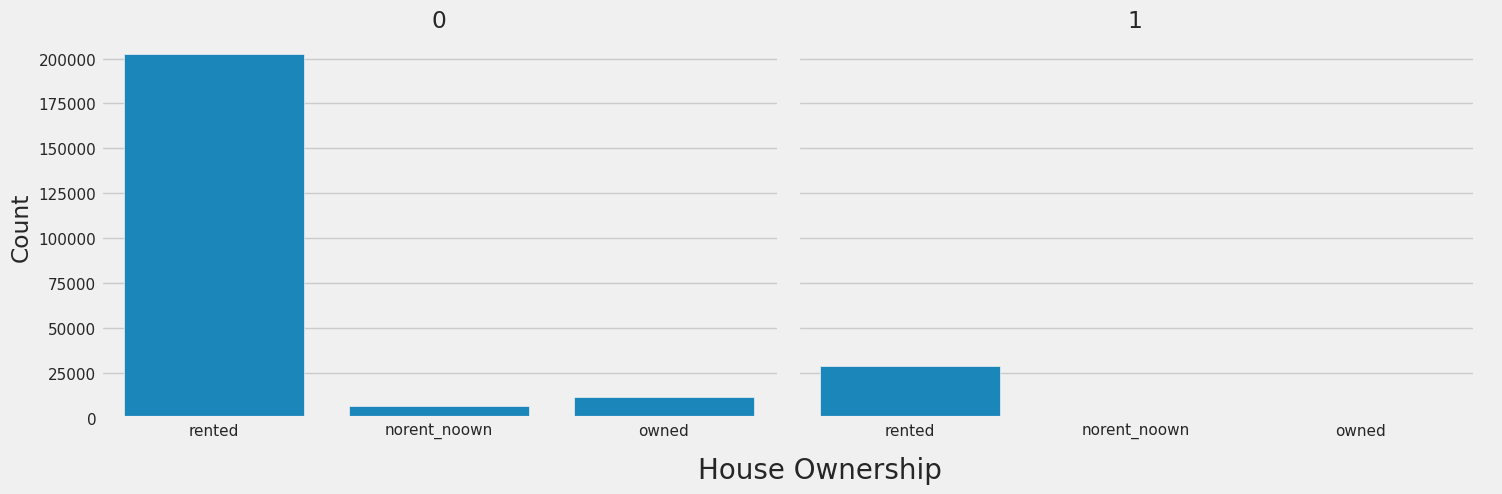

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=5, aspect=1.5)
g.map(sns.countplot, "House_Ownership")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")  # Set x-axis label to empty string
g.fig.text(0.55, 0.02, "House Ownership", ha="center", fontsize=20)

**Risk Flag berdasarkan Car Ownership**

Text(0.55, 0.02, 'Car Ownership')

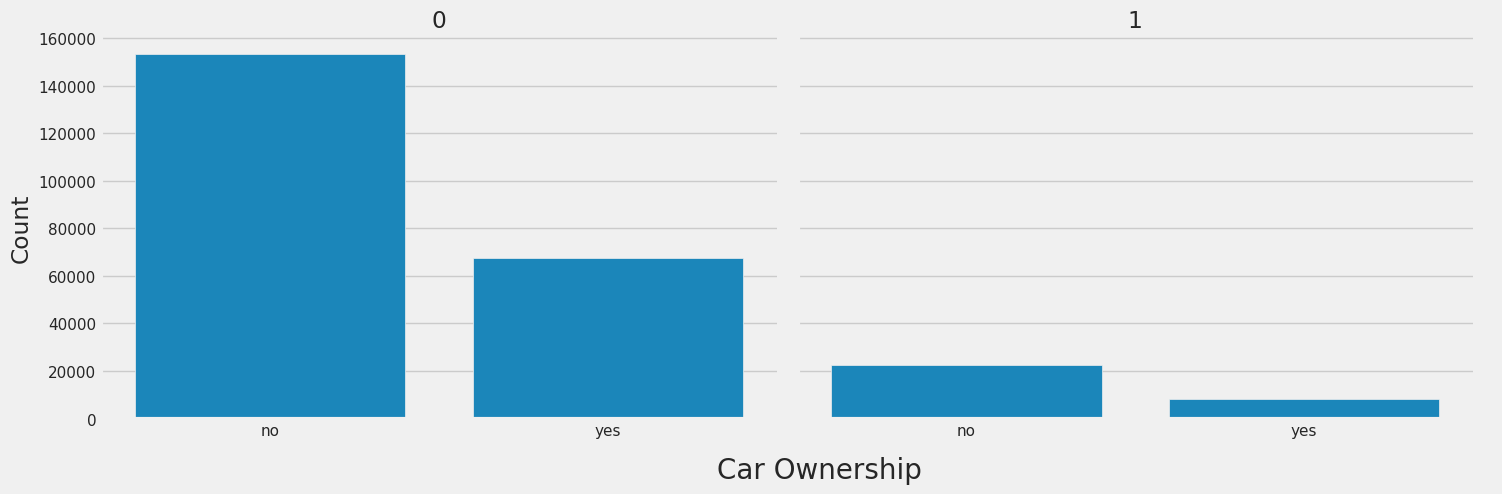

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=5, aspect=1.5)
g.map(sns.countplot, "Car_Ownership")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")  # Set x-axis label to empty string
g.fig.text(0.55, 0.02, "Car Ownership", ha="center", fontsize=20)

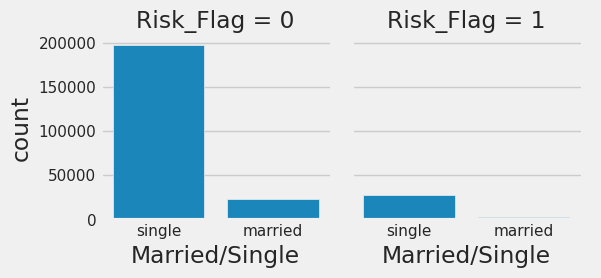

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=3)
g.map(sns.countplot, "Married/Single")
g.add_legend()

<Axes: >

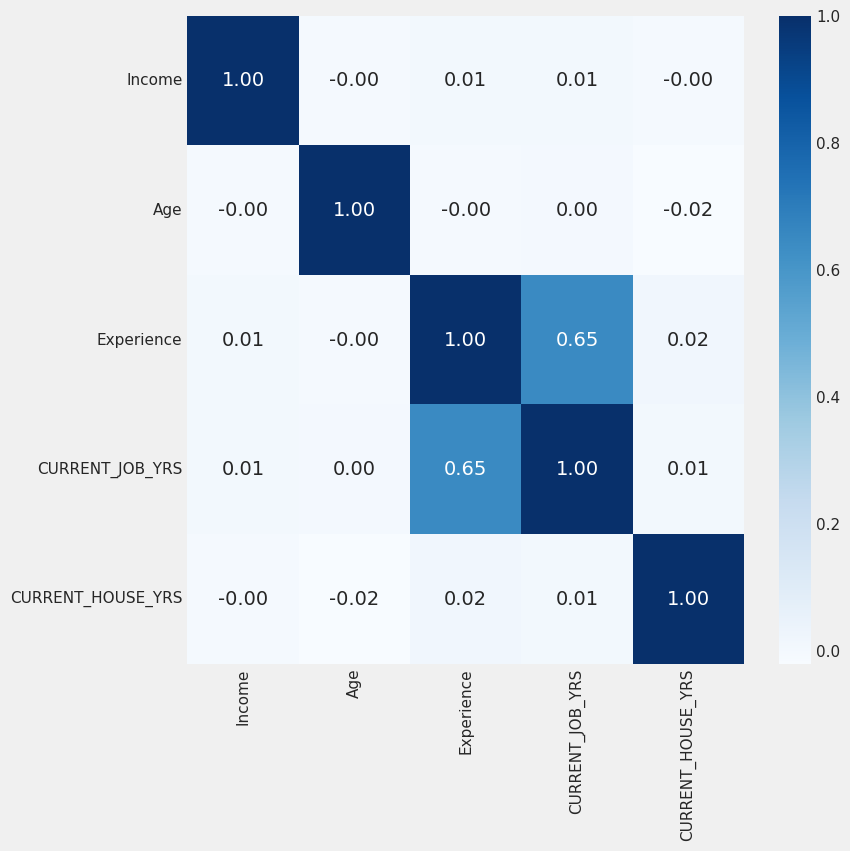

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Korelasi antara feature dan label berkisar antara -0.03  - 0.00. Feature yang paling relevan adalah feature experience karena korelasi negatif yang lemah antara Experience dengan Risk_Flag -0.03. Artinya, semakin tinggi pengalaman seseorang, sedikit lebih rendah juga tanda risiko  oleh karena itu semua feature akan dipertahankan


Adanya korelasi antara kolom Current_Job_Yrs & Experience sebesar 0.65. Karena korelasinya masih < 0.75 maka belum mengakibatkan redundant maka tidak perlu dilakukan treatment khusus



<Figure size 800x800 with 0 Axes>

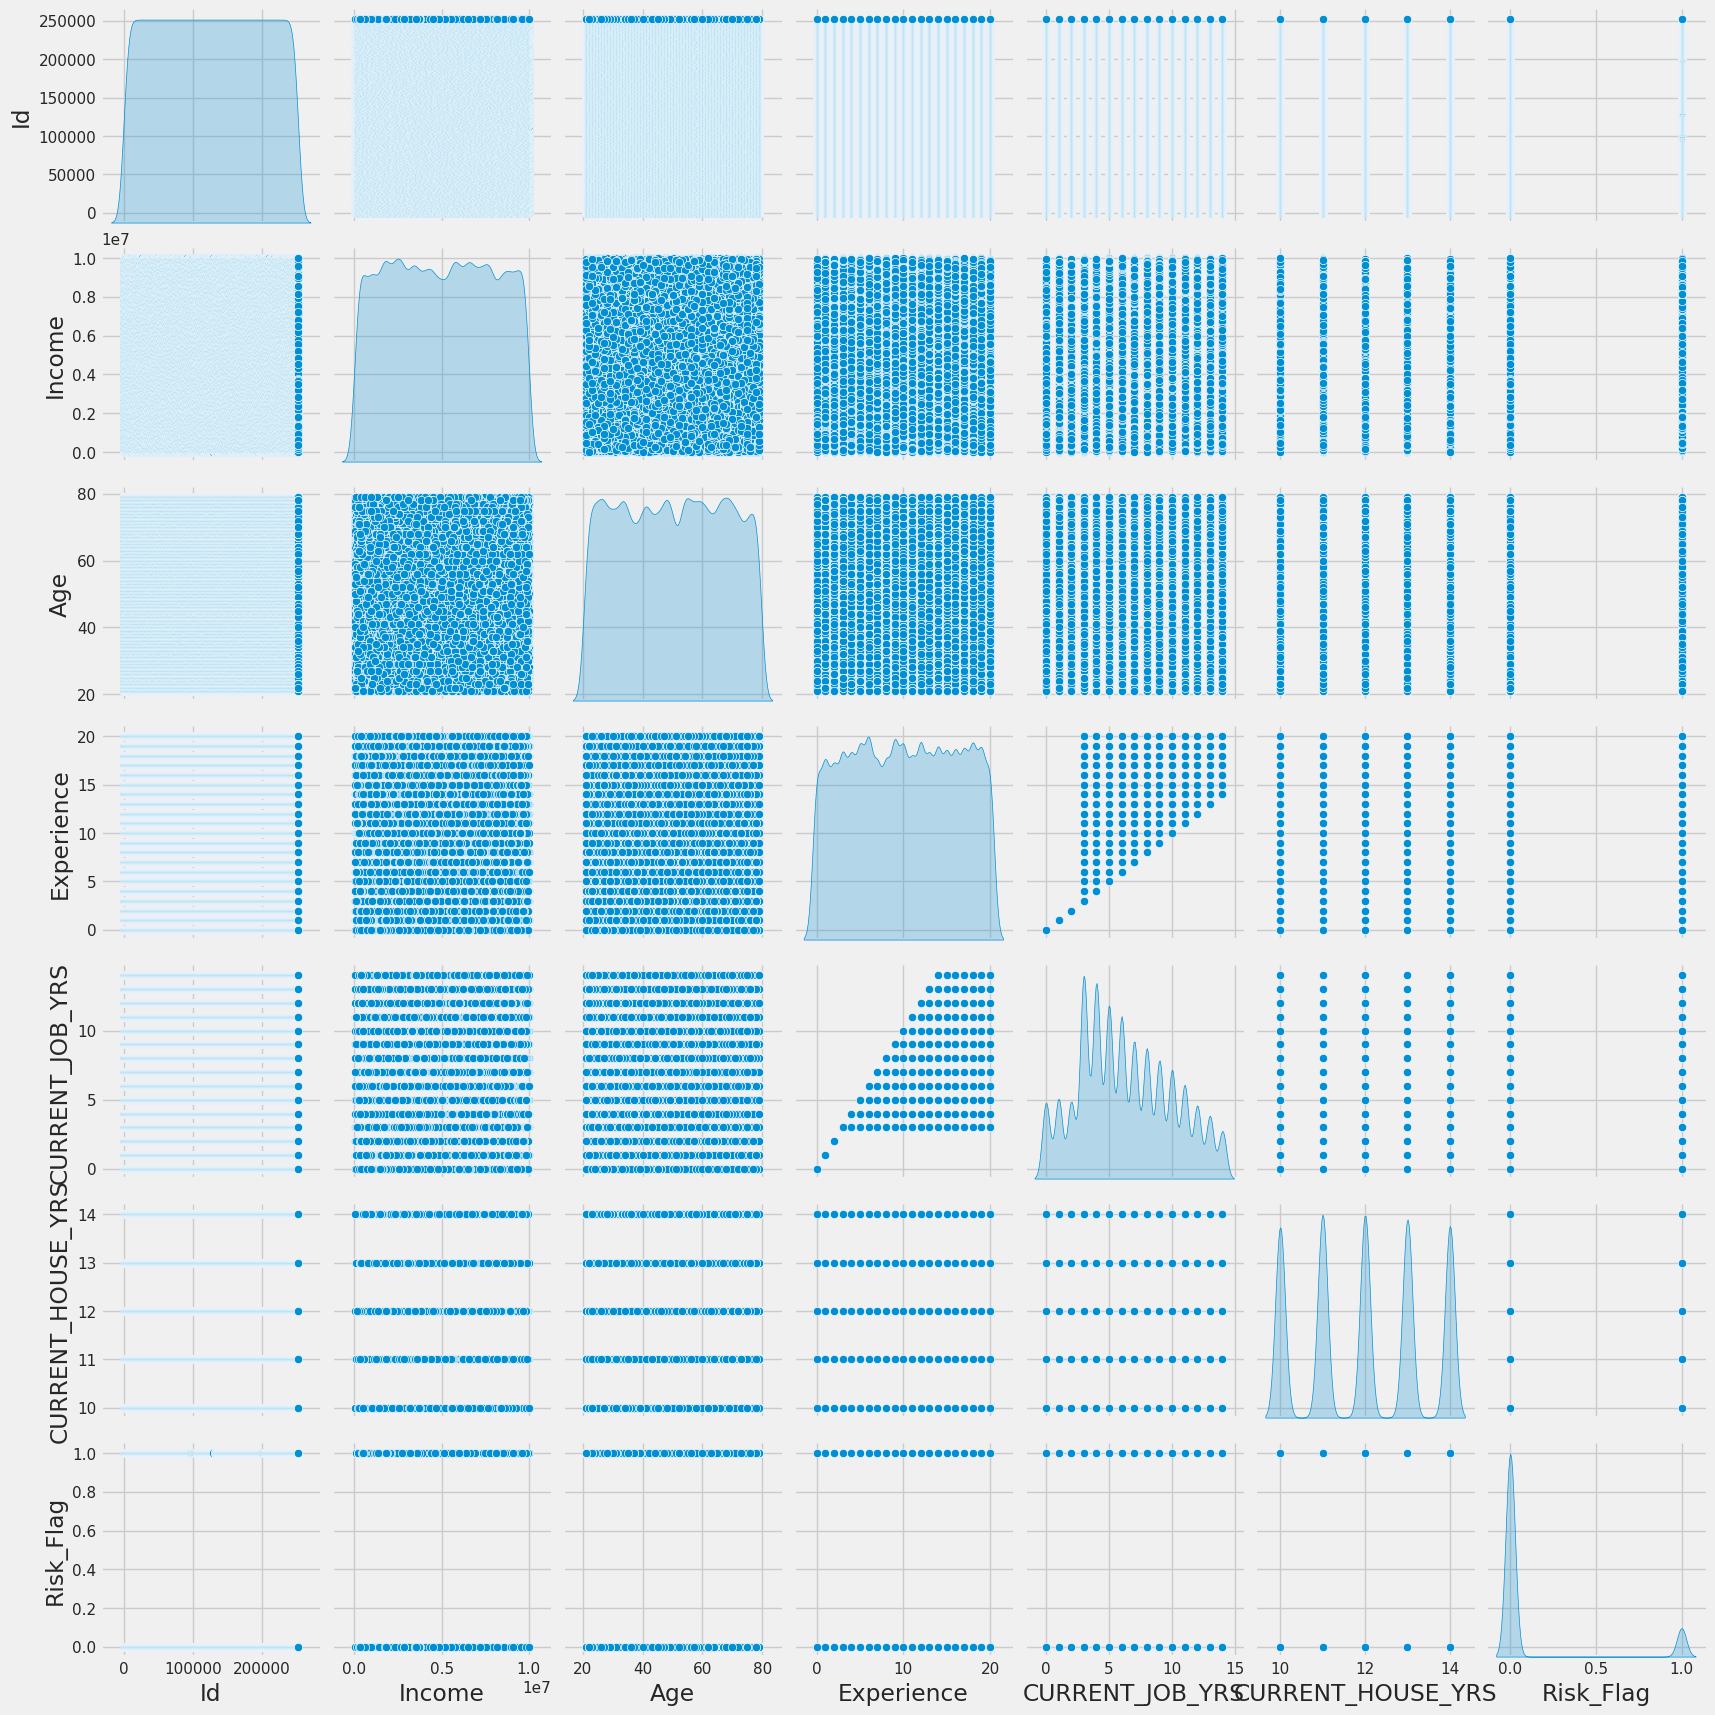

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, diag_kind='kde')

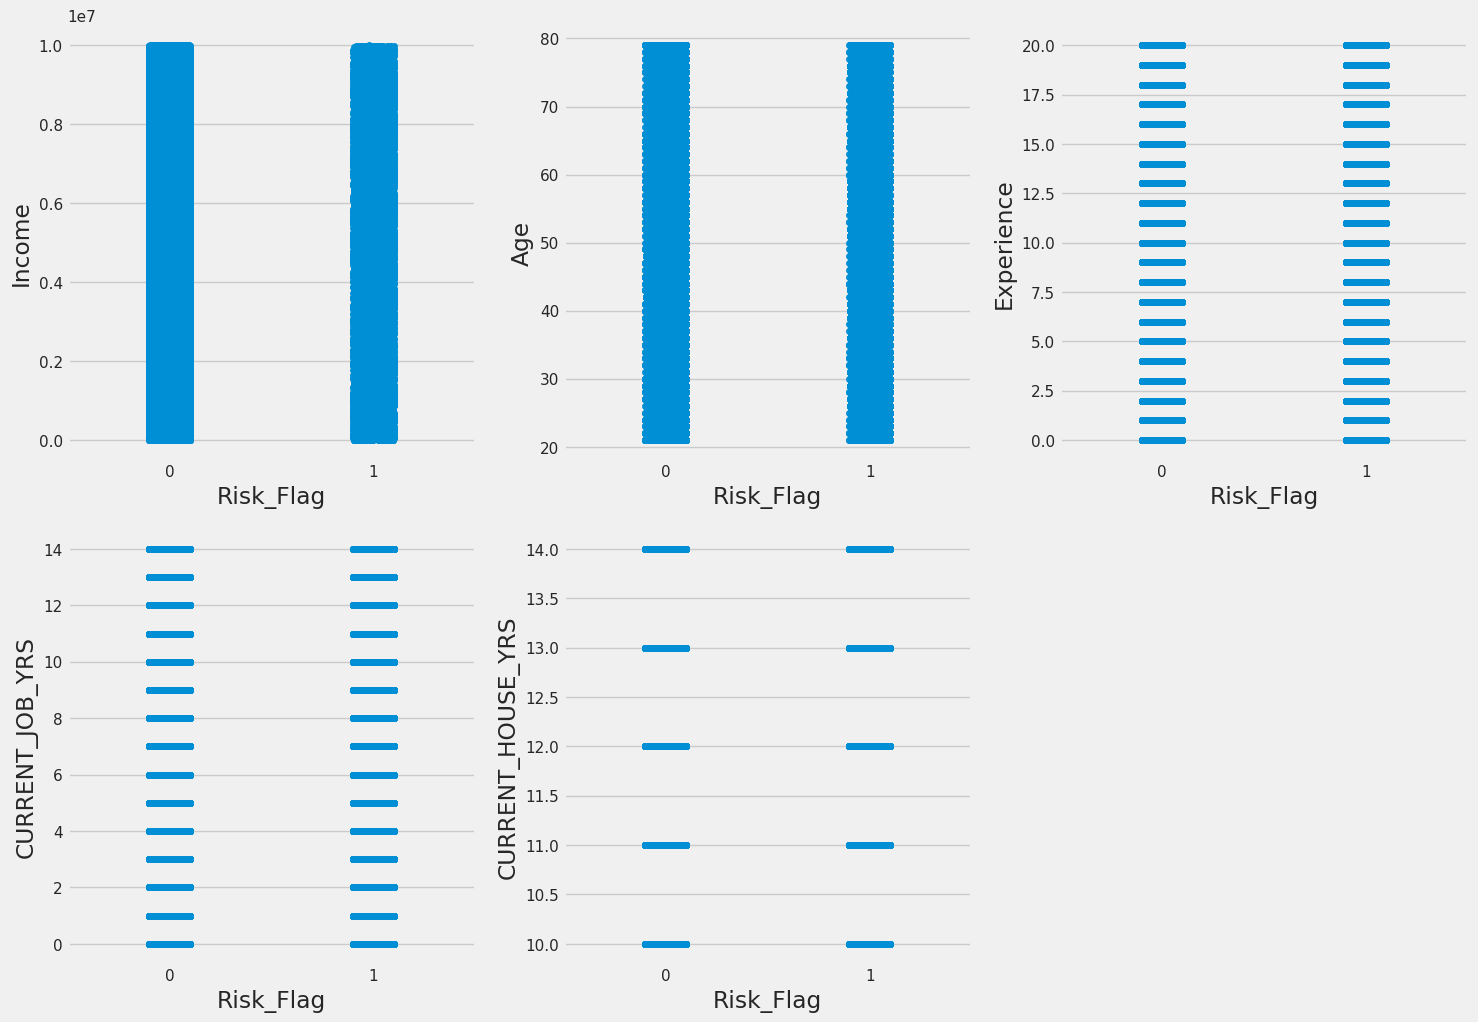

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1)
    sns.stripplot(ax=ax, data=df, x='Risk_Flag', y=nums[i])
    plt.tight_layout()

##Multivariate Analysis

**Analytic based on gabungan Income & Experience terhadap target variable**

<Axes: xlabel='Experience', ylabel='Income'>

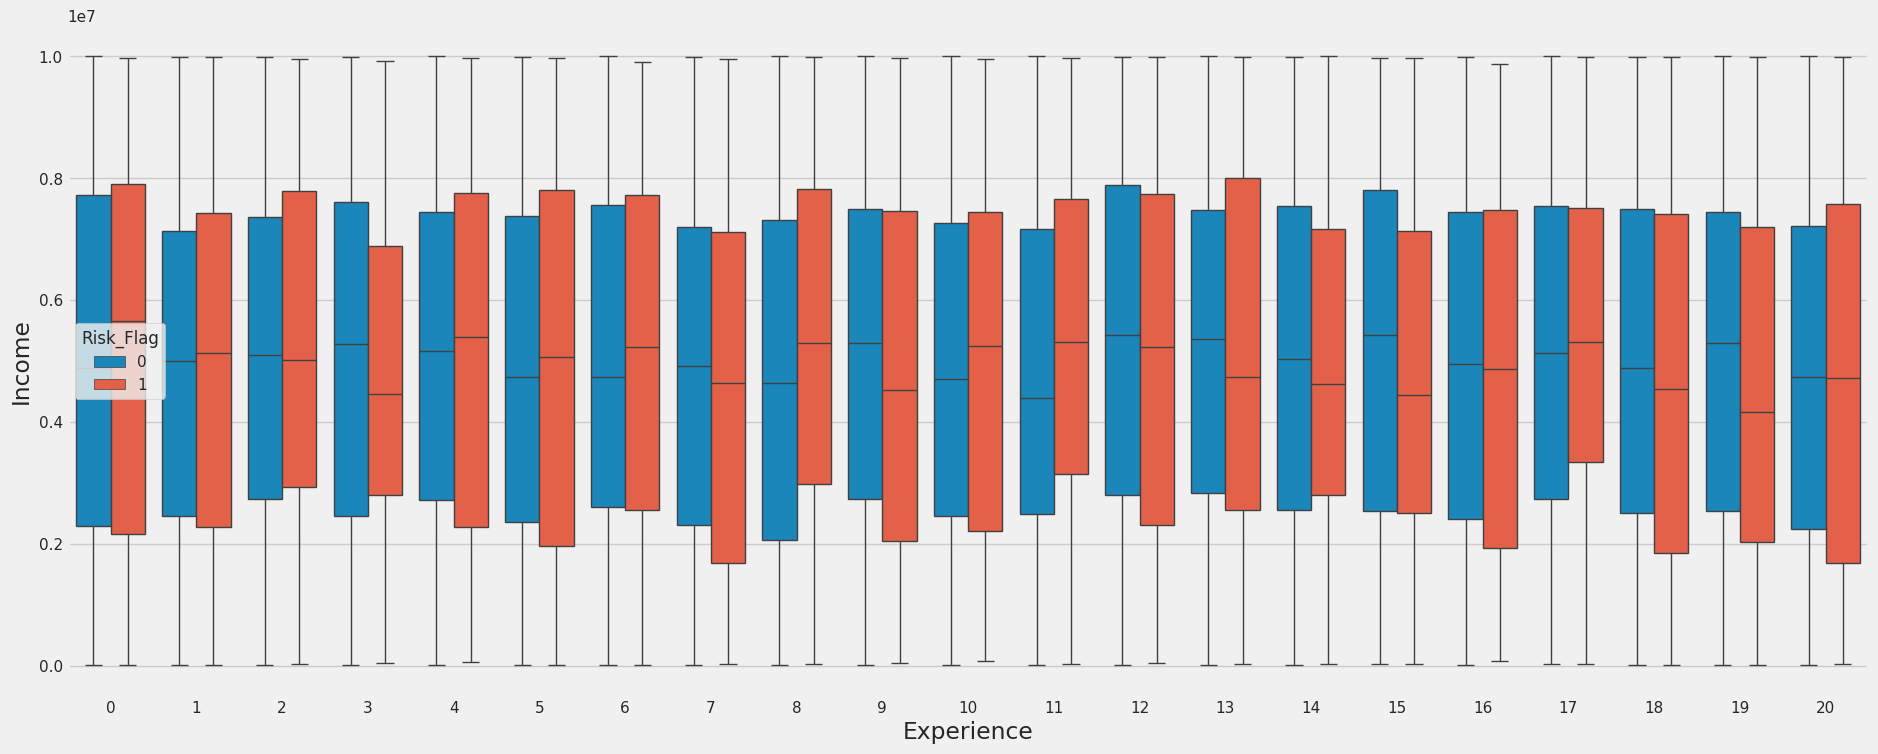

In [ ]:
sns.boxplot(x='Experience', y='Income', hue='Risk_Flag', data=df)

In [ ]:
df['group_income'] = pd.qcut(df['Income'], q=3, labels=['Low Income', 'Medium Income', 'High Income'])

In [ ]:
df['group_age'] = pd.cut(df['Age'], bins=[20, 25, 45, 65, float('inf')], labels=['Remaja', 'Dewasa', 'Lansia', 'Manula'])

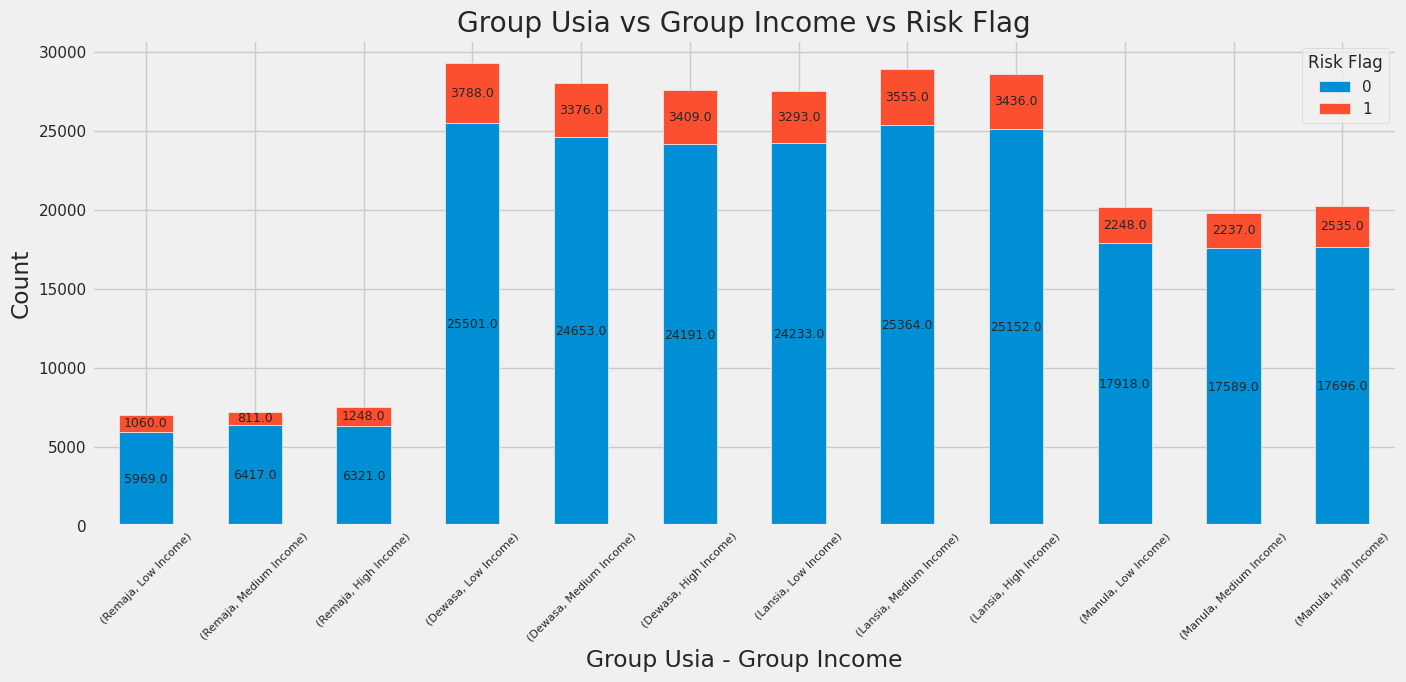

In [ ]:
contingency_table = pd.crosstab([df['group_age'], df['group_income']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Group Usia vs Group Income vs Risk Flag')
plt.xlabel('Group Usia - Group Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=8)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()


Berdasarkan grafik di atas bahwa tiap group usia dan group income sama-sama lebih dominan tidak beresiko risk flag dari pada yang beresiko risk flag.

Jumlah nasabah yang tidak beresiko risk flag yang terbesar yaitu pada group usia dewasa dan group low income sebesar 25501. Sebaliknya yang terkecil adalah group usia remaja dan group low income sebesar 5969.

Jumlah nasabah yang beresiko risk flag yang terbesar yaitu pada group usia dewasa dan group low income sebesar 3788. Sebaliknya yang terkecil adalah group usia remaja dan group medium income sebesar 811.


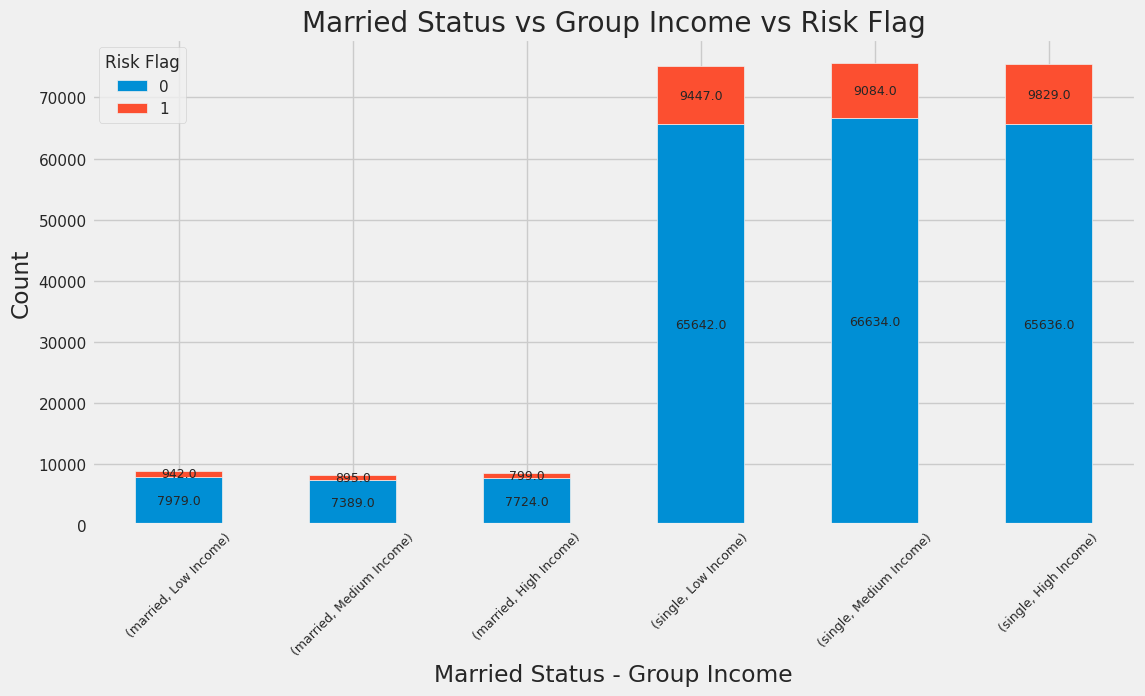

In [ ]:
contingency_table = pd.crosstab([df['Married/Single'], df['group_income']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Married Status vs Group Income vs Risk Flag')
plt.xlabel('Married Status - Group Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=9)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()


Berdasarkan grafik di atas, nasabah dengan status single dan rentang pendapatan High Income cenderung memiliki tingkat resiko cukup tinggi dalam gagal bayar pinjaman (memiliki risk flag yang terbesar) sebesar 9829 .

Sebaliknya untuk nasabah dengan status married dan rentang pendapatan High Income justru memiliki tingkat risk flag terendah sebesar 799.


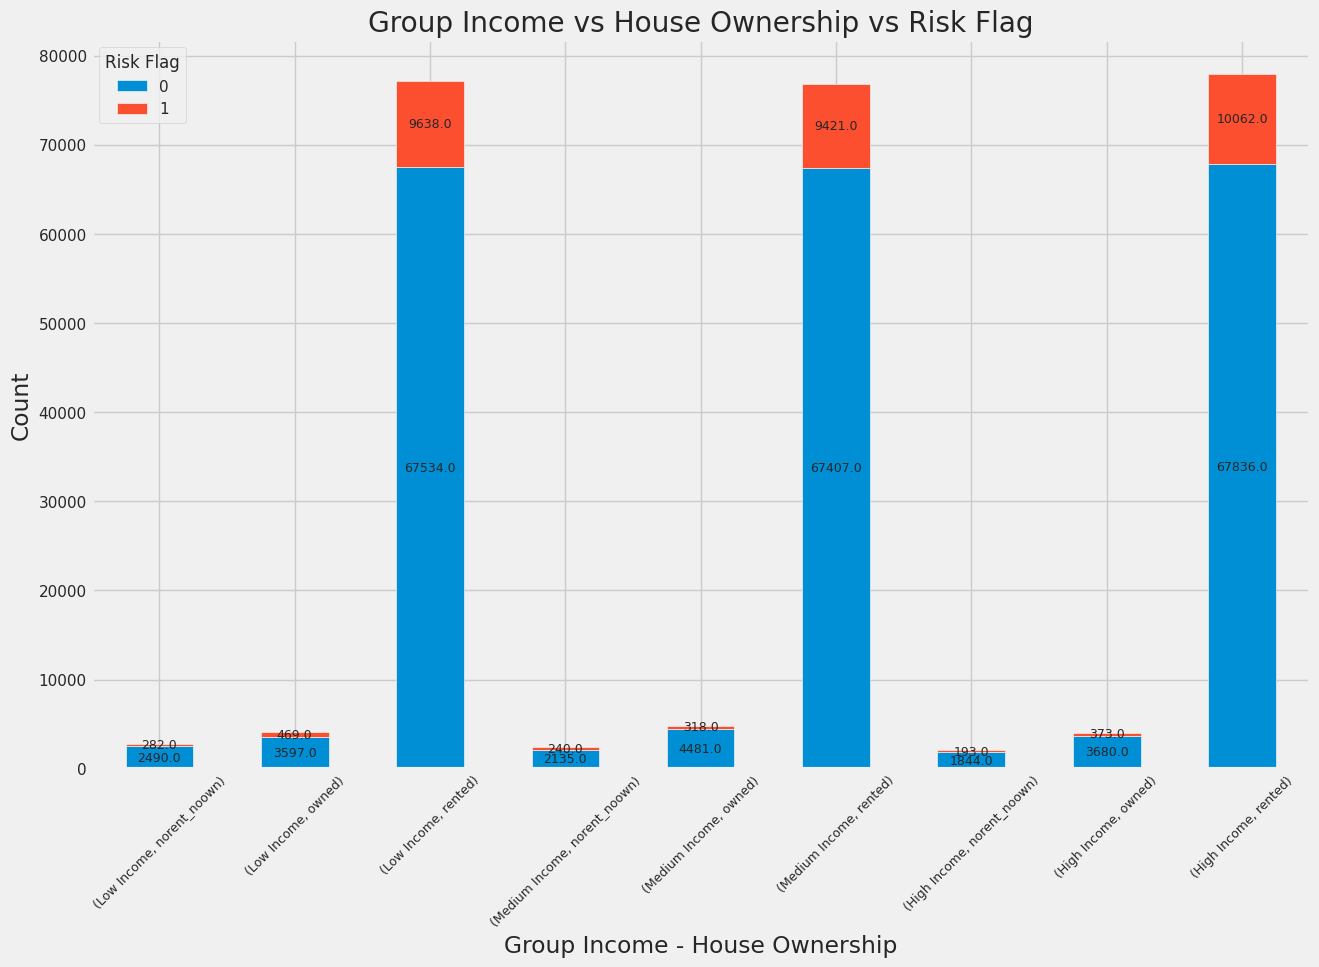

In [ ]:
contingency_table = pd.crosstab([df['group_income'], df['House_Ownership']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(14, 9))
plt.title('Group Income vs House Ownership vs Risk Flag')
plt.xlabel('Group Income - House Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=9)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()


Berdasarkan grafik di atas, bahwa tiap group income dan group house ownership sama-sama lebih dominan tidak beresiko risk flag dari pada yang beresiko risk flag.

Berdasarkan grafik di atas, bahwa group rented yang memiliki resiko risk flag terbesar sekaligus tidak memiliki resiko risk flag yang terbesar.

Berdasarkan grafik di atas, bahwa group norent noown yang memiliki resiko risk flag terkecil sekaligus tidak memiliki resiko risk flag yang terkecil.

Jumlah nasabah yang tidak beresiko risk flag yang terbesar yaitu pada group high income dan group rented sebesar 67836. Sebaliknya yang terkecil adalah group medium income dan group norent noown sebesar 1844.

Jumlah nasabah yang beresiko risk flag yang terbesar yaitu pada group high income dan group rented sebesar 10062. Sebaliknya yang terkecil adalah group medium income dan group norent noown sebesar 193.


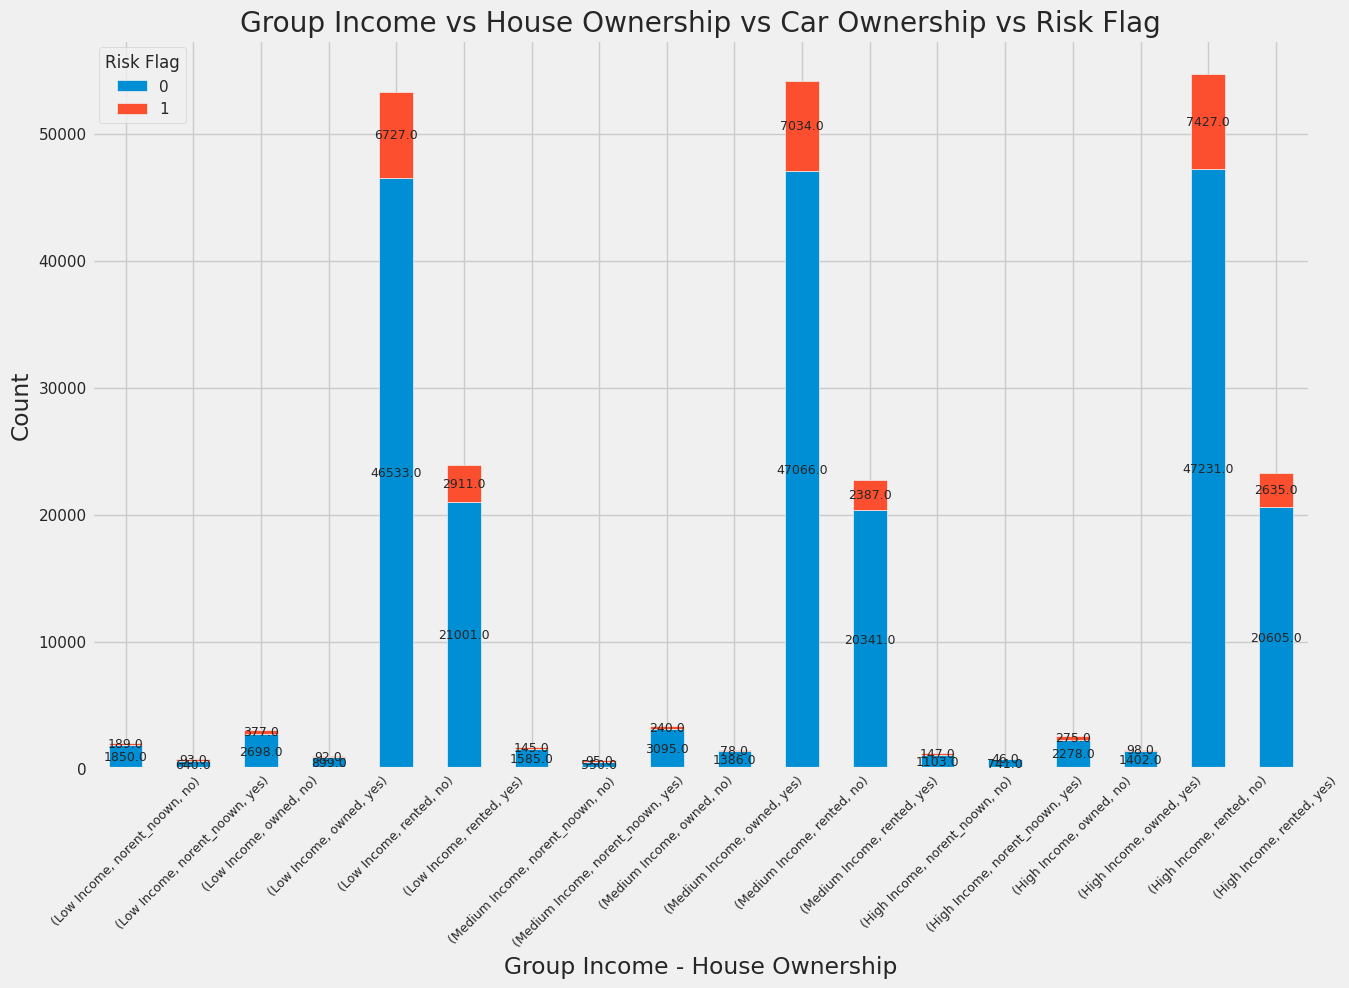

In [ ]:
contingency_table = pd.crosstab([df['group_income'], df['House_Ownership'], df['Car_Ownership']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(14, 9))
plt.title('Group Income vs House Ownership vs Car Ownership vs Risk Flag')
plt.xlabel('Group Income - House Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=9)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()


<Figure size 1200x700 with 0 Axes>

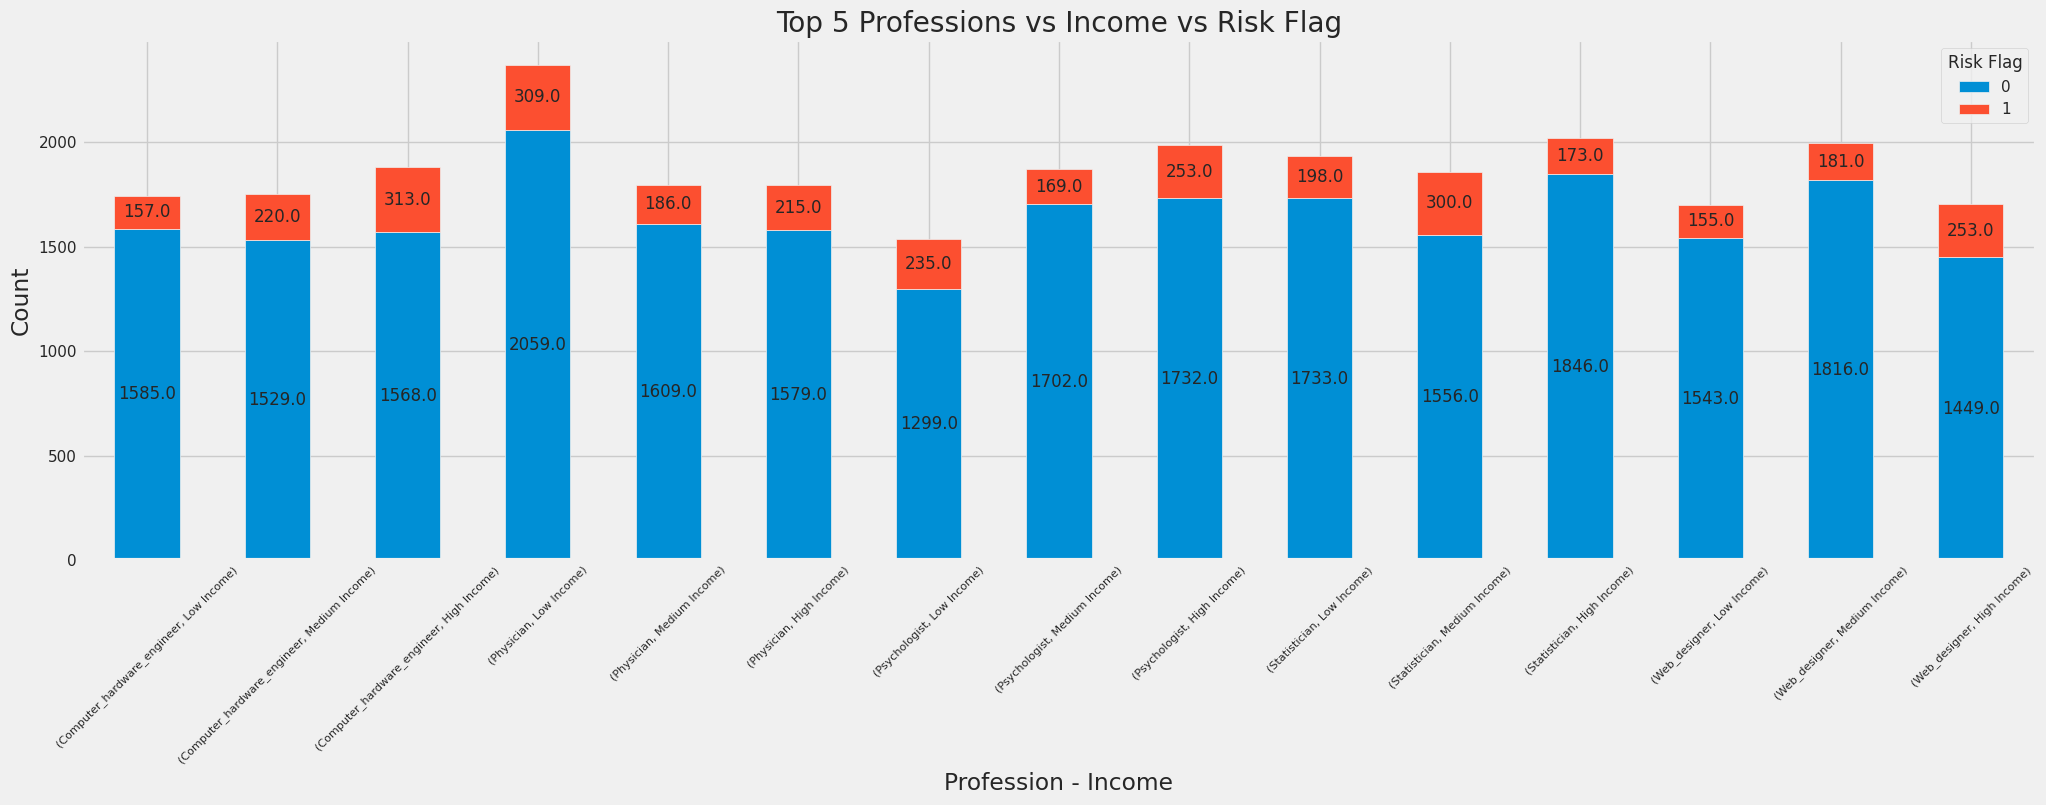

In [ ]:
top_5_professions = df['Profession'].value_counts().head(5).index.tolist()

filtered_data_top = df[df['Profession'].isin(top_5_professions)]

contingency_table_top = pd.crosstab([filtered_data_top['Profession'], filtered_data_top['group_income']], filtered_data_top['Risk_Flag'], margins=True)

plt.figure(figsize=(12, 7))
ax = contingency_table_top.drop(index='All', columns=['All']).plot(kind='bar', stacked=True)
plt.title('Top 5 Professions vs Income vs Risk Flag')
plt.xlabel('Profession - Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=8)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

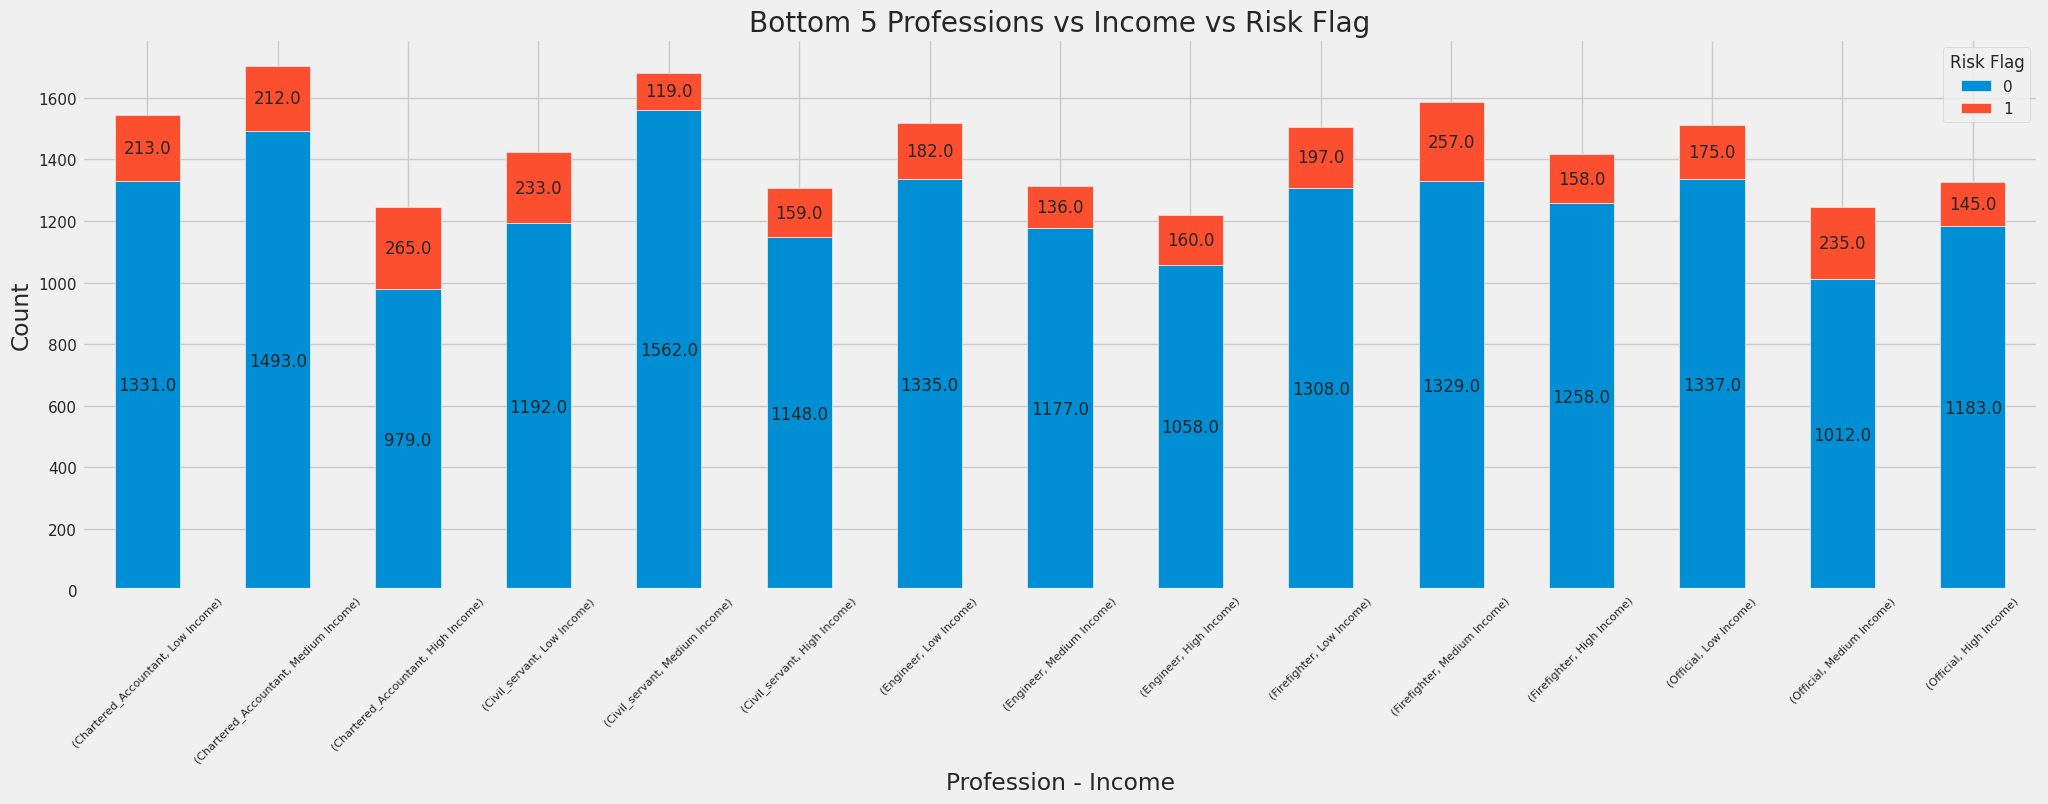

In [ ]:
bottom_5_professions = df['Profession'].value_counts().tail(5).index.tolist()

filtered_data_bottom = df[df['Profession'].isin(bottom_5_professions)]

contingency_table_top = pd.crosstab([filtered_data_bottom['Profession'], filtered_data_bottom['group_income']], filtered_data_bottom['Risk_Flag'], margins=True)

plt.figure(figsize=(12, 6))
ax = contingency_table_top.drop(index='All', columns=['All']).plot(kind='bar', stacked=True)
plt.title('Bottom 5 Professions vs Income vs Risk Flag')
plt.xlabel('Profession - Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=8)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


**Analytic based on gabungan Profesi & Income terhadap target variable**

<Axes: xlabel='Profession', ylabel='Income'>

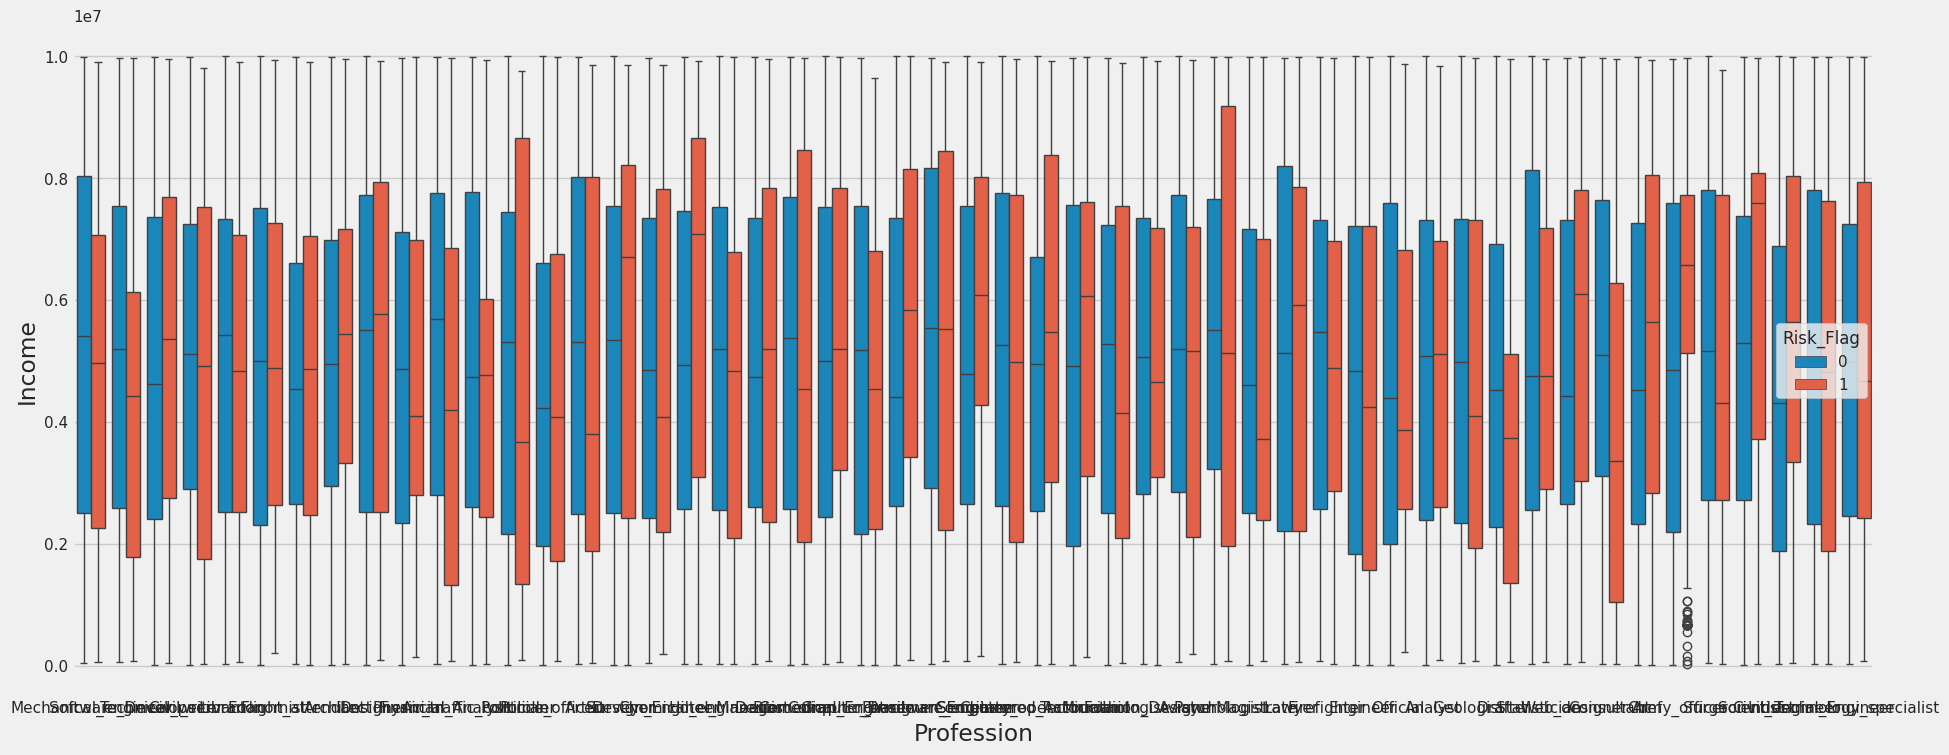

In [ ]:
sns.boxplot(x='Profession', y='Income', hue='Risk_Flag', data=df)

**Analytic based on lokasi & Income terhadap target variable**

<Axes: xlabel='STATE', ylabel='Income'>

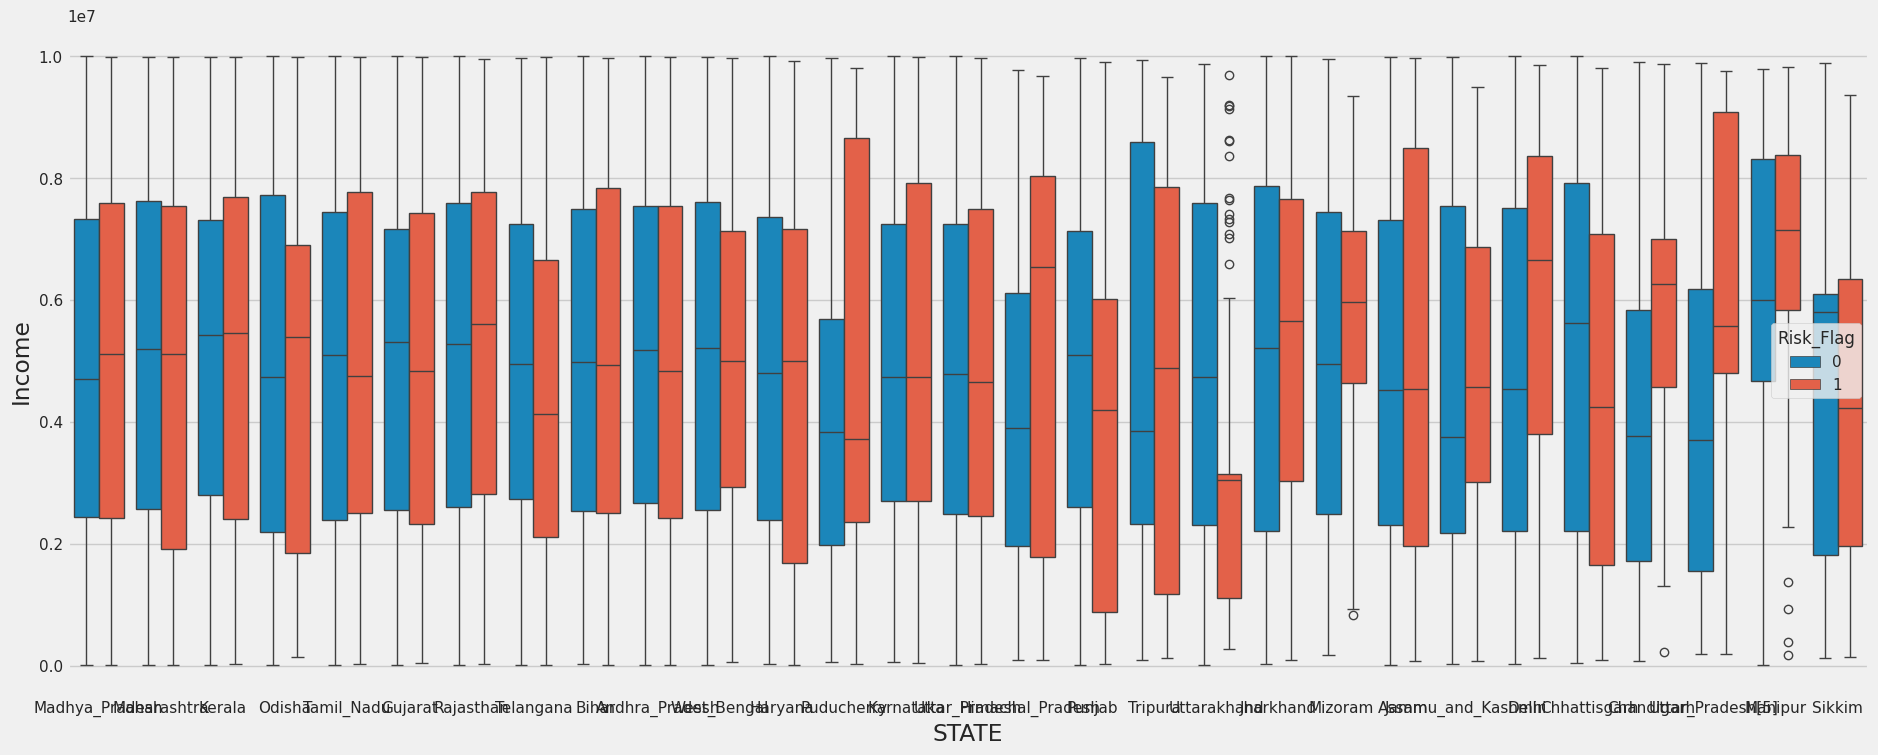

In [ ]:
sns.boxplot(x='STATE', y='Income', hue='Risk_Flag', data=df)

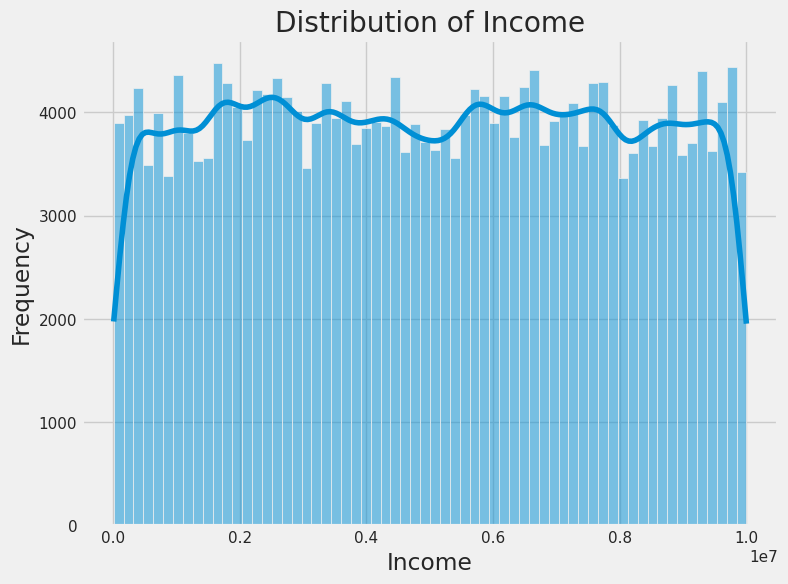

<Figure size 2070x827 with 0 Axes>

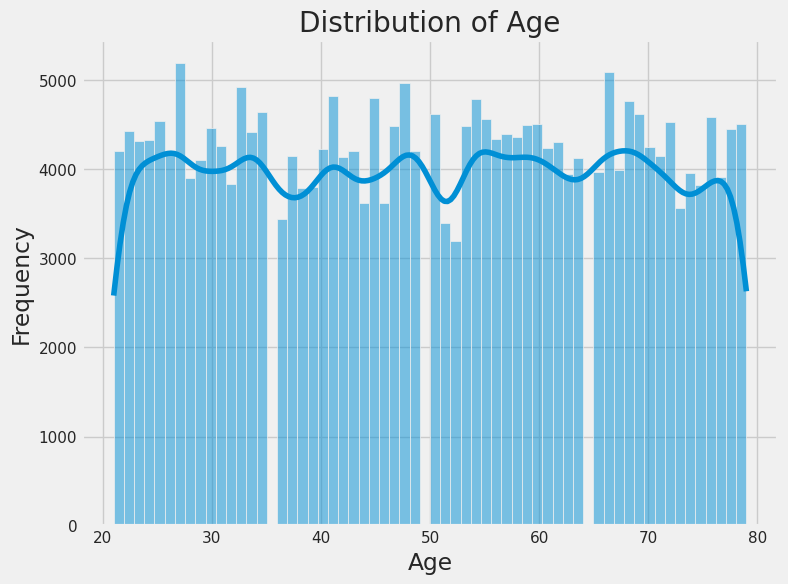

<Figure size 2070x827 with 0 Axes>

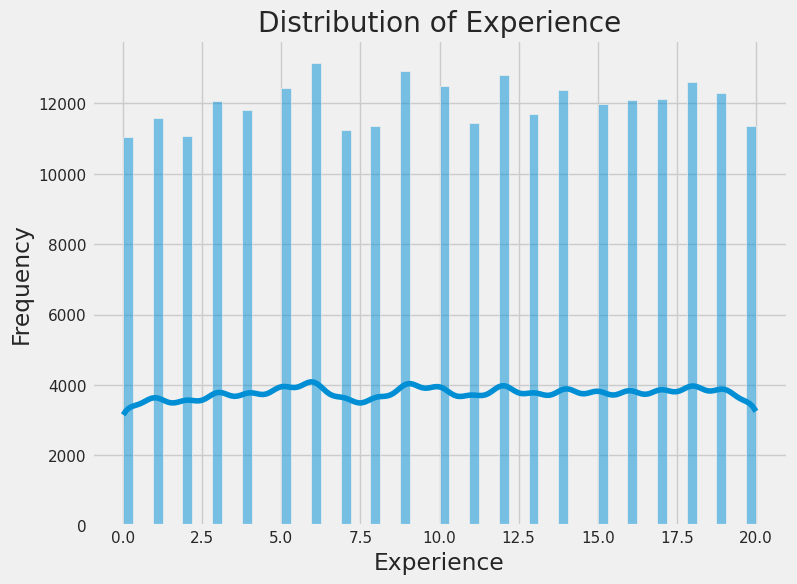

<Figure size 2070x827 with 0 Axes>

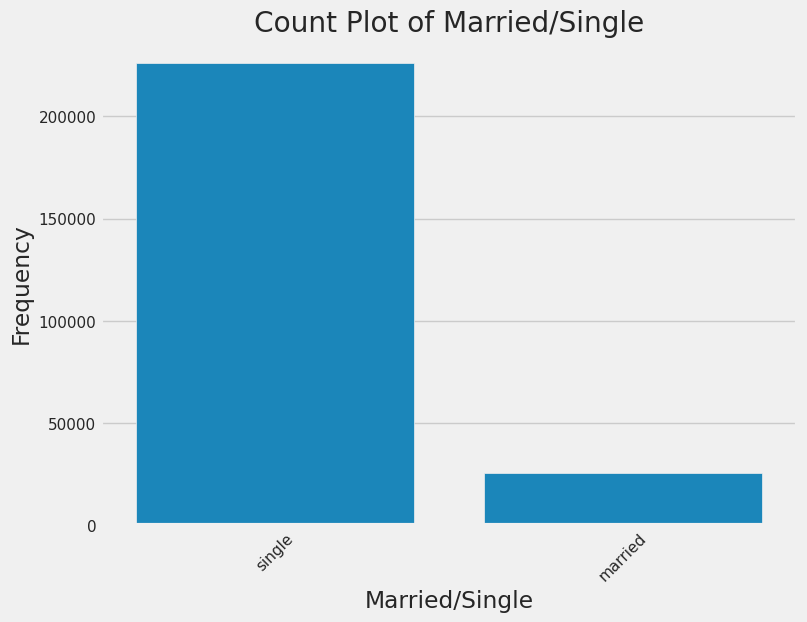

<Figure size 2070x827 with 0 Axes>

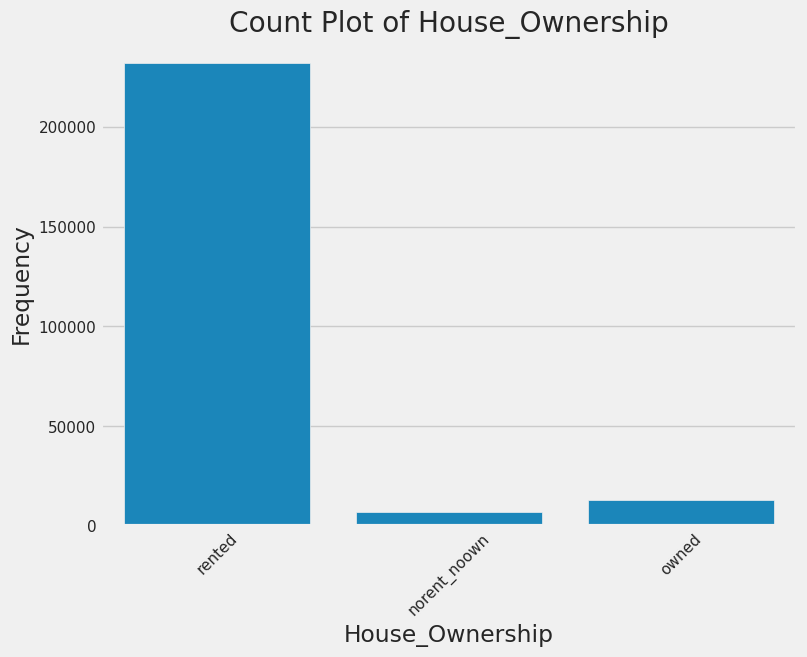

<Figure size 2070x827 with 0 Axes>

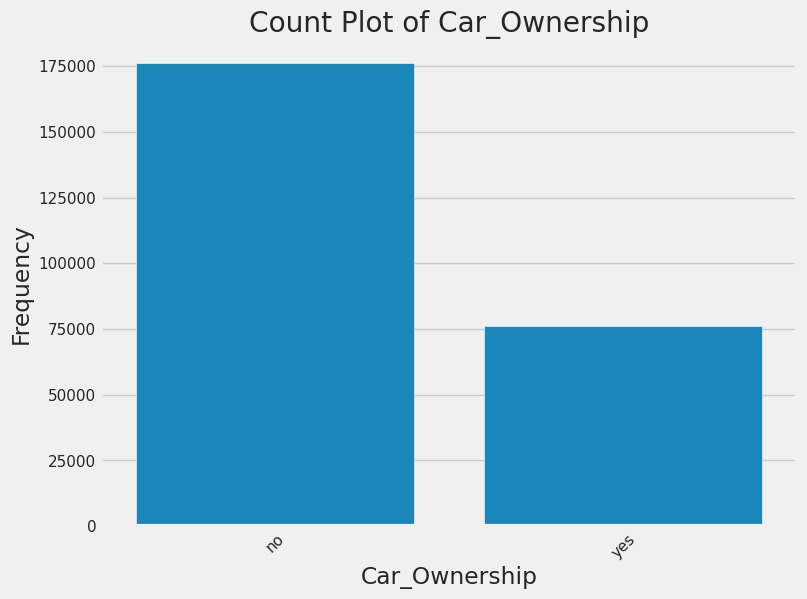

<Figure size 2070x827 with 0 Axes>

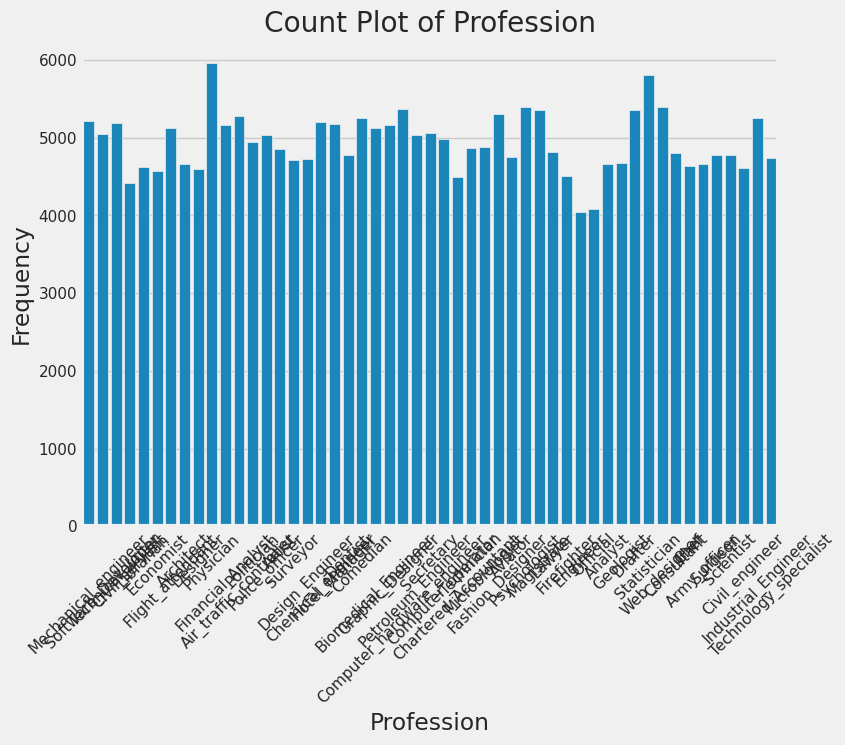

<Figure size 2070x827 with 0 Axes>

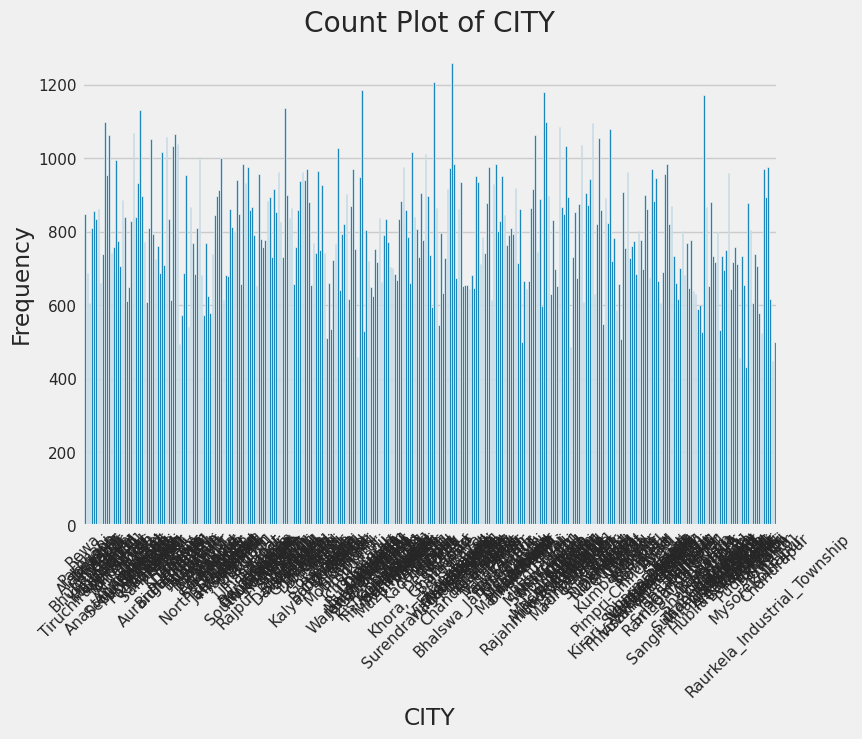

<Figure size 2070x827 with 0 Axes>

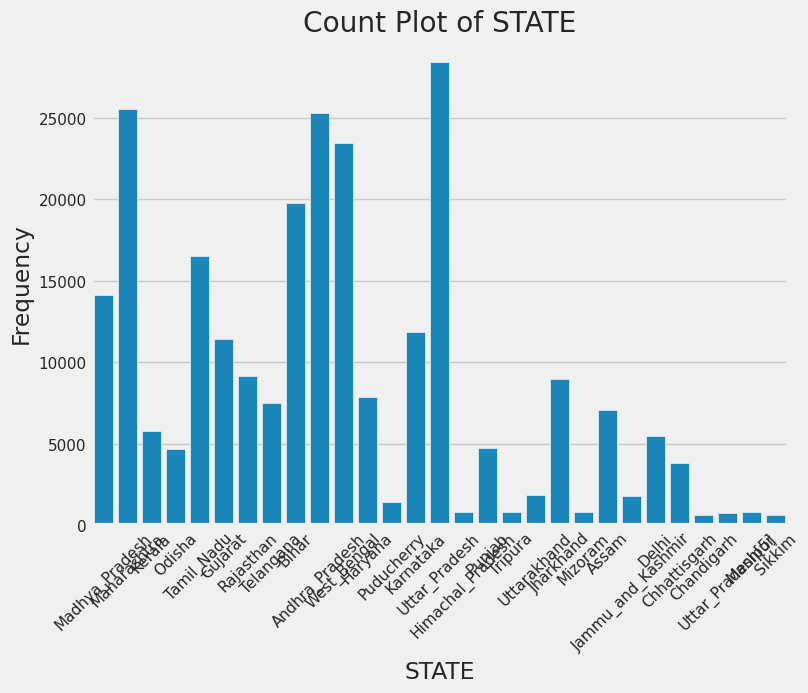

<Figure size 2070x827 with 0 Axes>

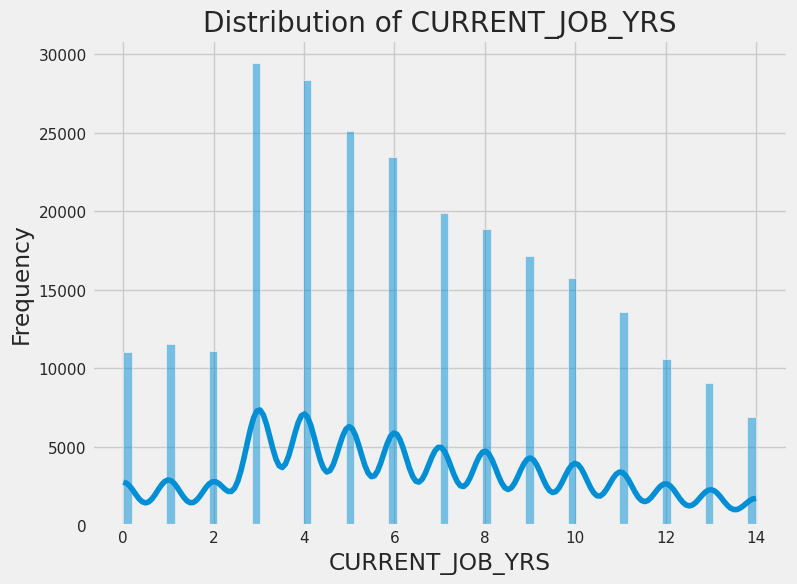

<Figure size 2070x827 with 0 Axes>

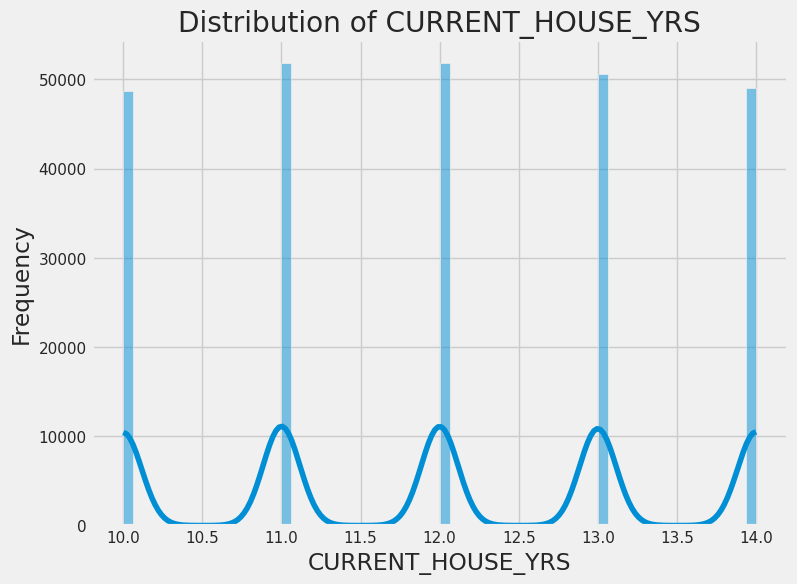

<Figure size 2070x827 with 0 Axes>

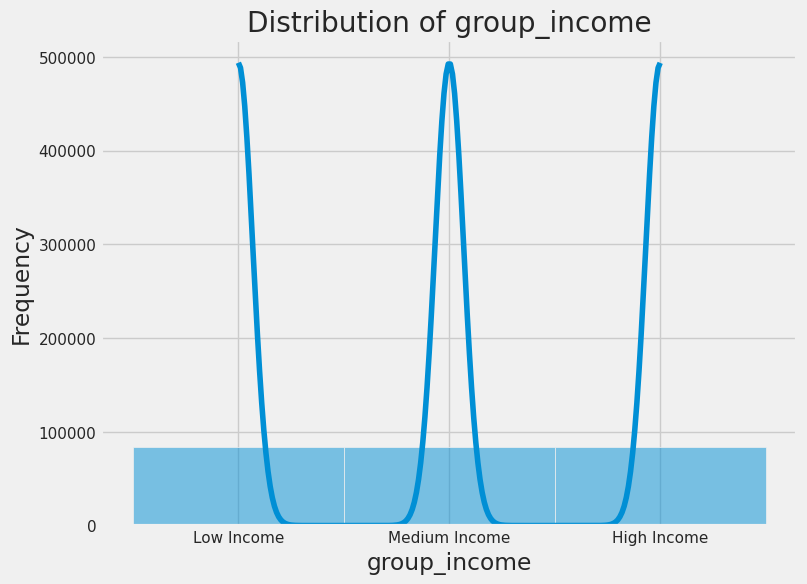

<Figure size 2070x827 with 0 Axes>

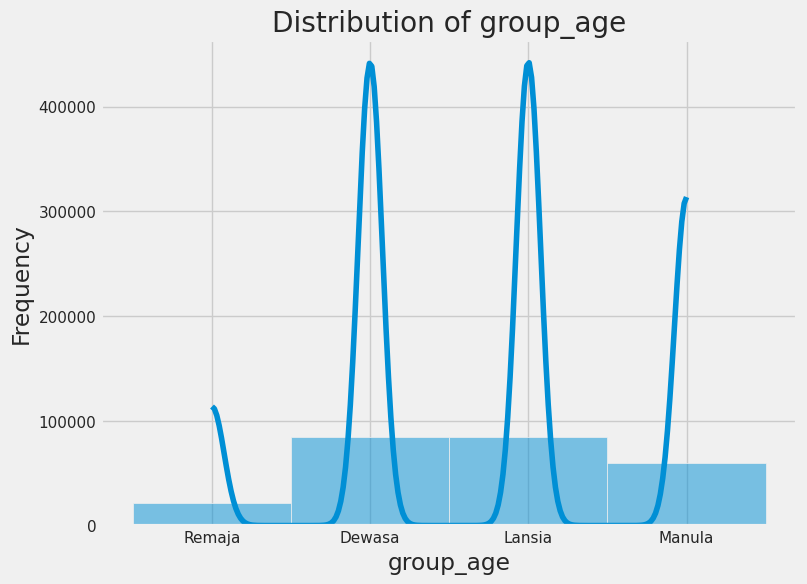

<Figure size 2070x827 with 0 Axes>

In [ ]:
for feature in df.columns:
    if feature not in ['Id', 'Risk_Flag']:
        plt.figure(figsize=(8, 6))
        if df[feature].dtype == 'object':
            sns.countplot(x=feature, data=df)
            plt.title(f'Count Plot of {feature}')
            plt.xticks(rotation=45)
        else:
            sns.histplot(df[feature], kde=True)
            plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        # Add a line space between the current and next graph
        plt.gcf().clear()

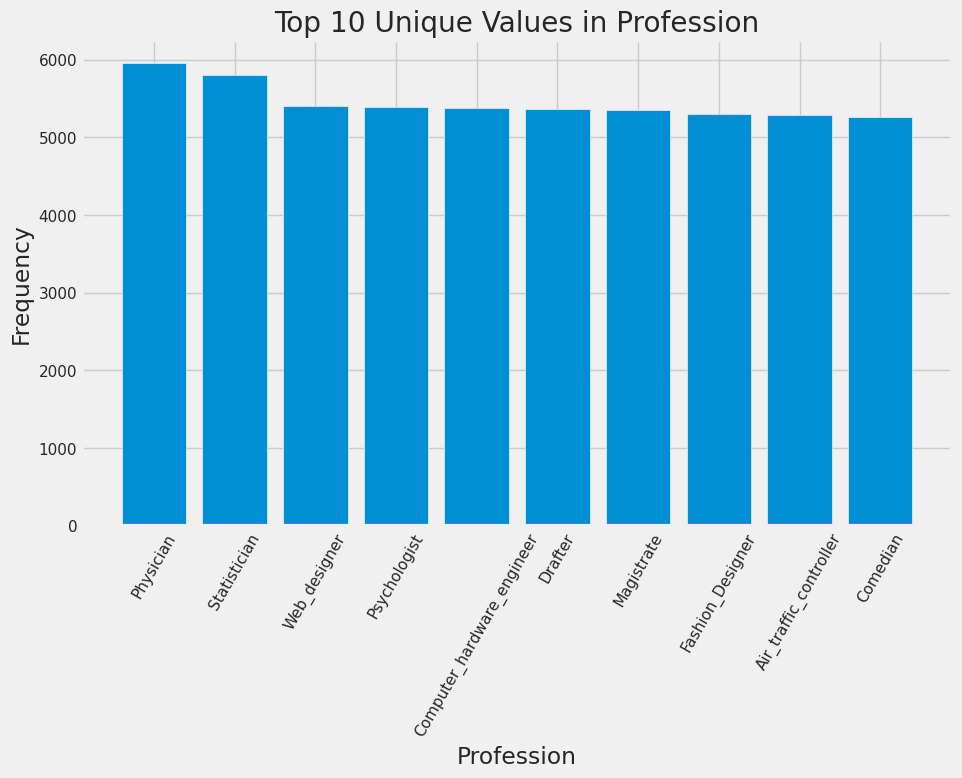

<Figure size 2070x827 with 0 Axes>

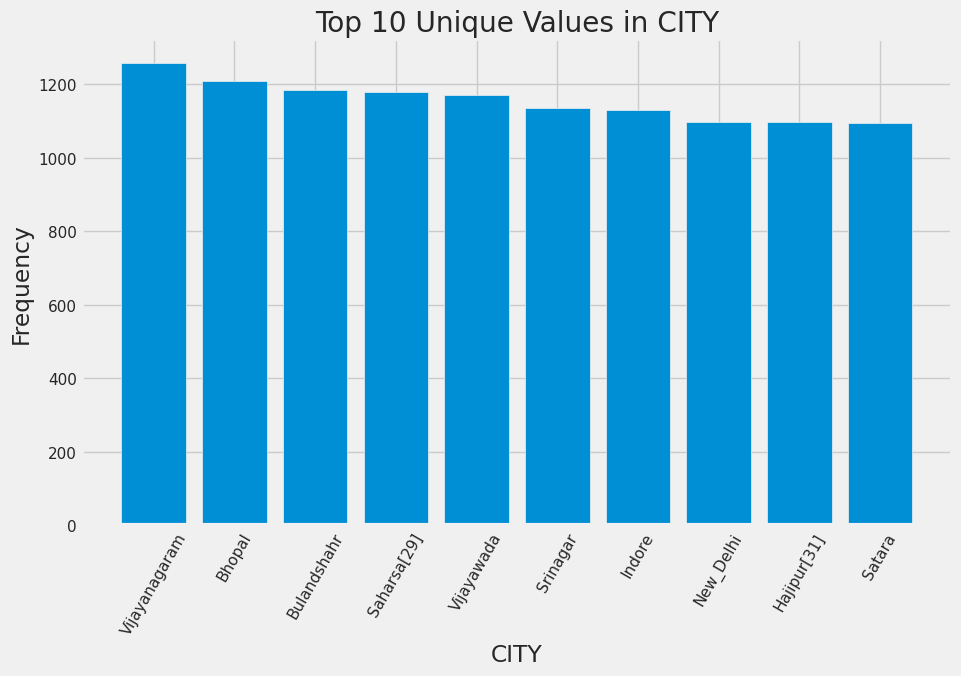

<Figure size 2070x827 with 0 Axes>

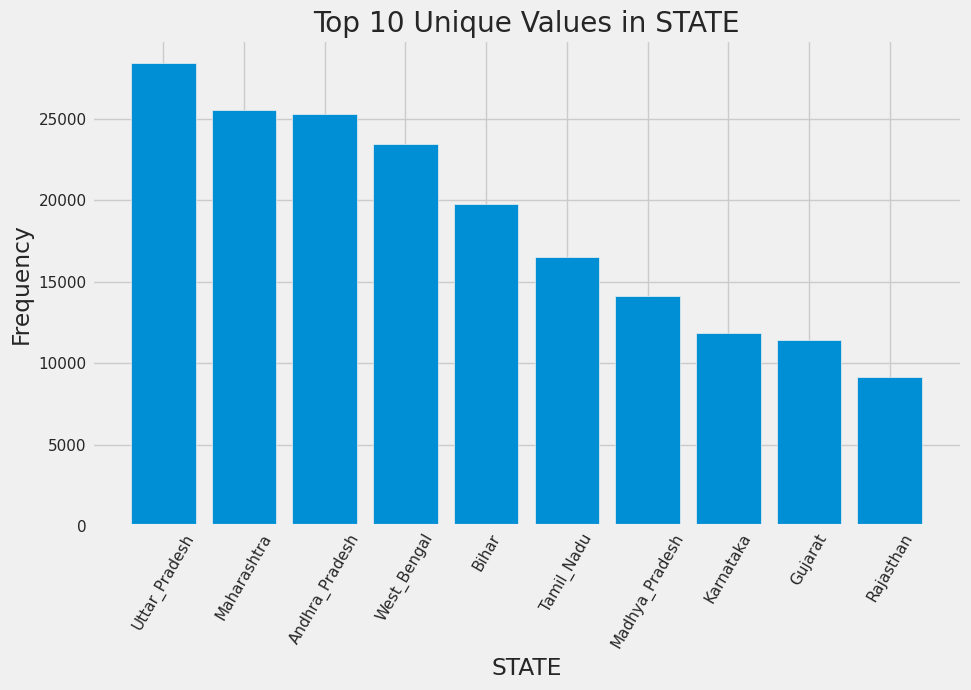

<Figure size 2070x827 with 0 Axes>

In [ ]:
# Loop through the features in the DataFrame
for feature in df.columns:
    if feature in ['CITY', 'STATE', 'Profession']:
        # Create a new figure for the current graph
        plt.figure(figsize=(10, 6))

        # Get the top 10 unique values for the feature
        top_10 = df[feature].value_counts().head(10)

        # Create a bar plot of the top 10 unique values
        plt.bar(top_10.index, top_10.values)
        plt.xticks(rotation=60)
        plt.title(f'Top 10 Unique Values in {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

        # Display the current figure without waiting for the user to close it
        plt.show(block=False)

        # Add a line space between the current and next graph
        plt.gcf().clear()

In [ ]:
# Define numerical values for each category
income_values = {'Low Income': 1, 'Medium Income': 2, 'High Income': 3}
house_values = {'rented': 2, 'owned': 3, 'norent_noown': 1}
car_values = {'no': 0, 'yes': 1}

# Map categorical values to numerical values
df['income_value'] = df['group_income'].map(income_values).astype(int)
df['house_value'] = df['House_Ownership'].map(house_values)
df['car_value'] = df['Car_Ownership'].map(car_values)

df['net_worth'] = df['income_value'] + df['house_value'] + df['car_value']

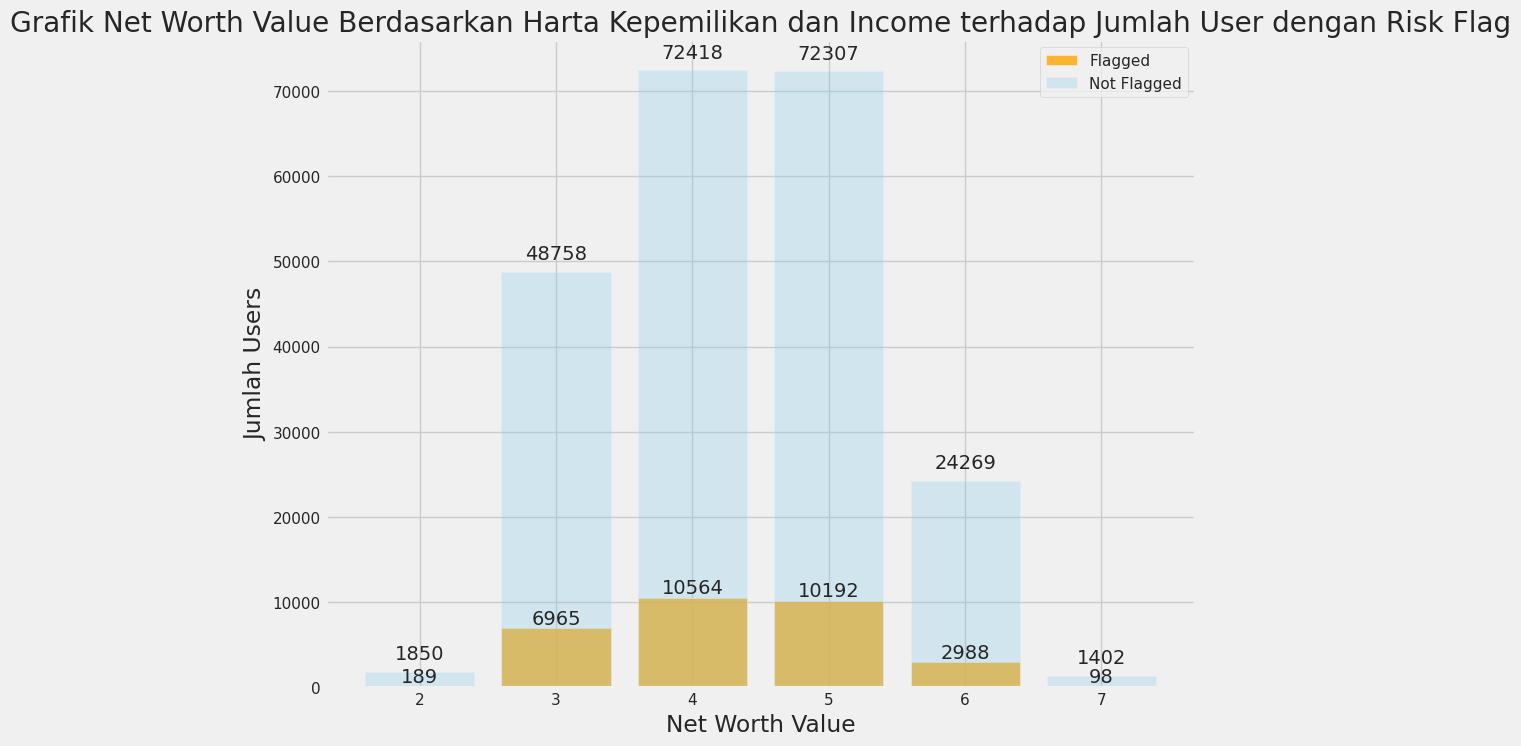

In [ ]:
grouped_data = df.groupby(['net_worth', 'Risk_Flag']).size().reset_index(name='count')

# Separate the data based on risk flag
flagged = grouped_data[grouped_data['Risk_Flag'] == 1]
not_flagged = grouped_data[grouped_data['Risk_Flag'] == 0]

flagged_midpoints = flagged['net_worth']
not_flagged_midpoints = not_flagged['net_worth']

plt.figure(figsize=(10, 8))


# Plot flagged users
plt.bar(flagged['net_worth'], flagged['count'], color='orange', label='Flagged', alpha=0.8)
for i, count in enumerate(flagged['count']):
    plt.text(flagged['net_worth'].iloc[i], count + 1, str(count), ha='center', va='bottom')

# Plot not flagged users
plt.bar(not_flagged['net_worth'], not_flagged['count'], color='skyblue', label='Not Flagged', alpha=0.3)
for i, count in enumerate(not_flagged['count']):
    plt.text(not_flagged['net_worth'].iloc[i], count + 1000, str(count), ha='center', va='bottom')


plt.xlabel('Net Worth Value')
plt.ylabel('Jumlah Users')
plt.title('Grafik Net Worth Value Berdasarkan Harta Kepemilikan dan Income terhadap Jumlah User dengan Risk Flag')
plt.legend()
plt.show()

**Business Insight :**
Berdasarkan Income, Kepemilikan Rumah dan Mobil dapat dibuat sebuah penilaian harta kepemilikan(Net Worth Value) dari User. Berdasarkan Incomenya dapat diberikan nilai 1-3 dari Low, Medium dan High Income berdasarkan pembagian dari Q1 dan Q3 Income. Untuk Kepemilikan rumah diberikan nilai 3 untuk ‘owned’, 2 untuk ‘rented’ dan 1 untuk ‘noown_norent’ dan kemudian dijumlahkan. Untuk kepemilikan mobil digunakan 1 untuk ‘yes’ dan 0 untuk ‘no’. Dari grafik tersebut user dominan memiliki harta kekayaan baik itu dari Income, rumah ataupun mobil. User dengan value score 4 memiliki jumlah terbanyak dan juga memiliki risk yang besar.


**Business Recommendation:**
Pemberian kredit kepada nasabah dengan networth value yang bernilai 4 kebawah dapat dilakukan penambahan % bunga atau peningkatan DP untuk mengurangi kerugian apabila user tersebut gagal bayar.


# Pre Processing Data

## Handle missing values

In [ ]:
null_counts = df.isna().sum()
print(null_counts)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
group_income         0
group_age            0
income_value         0
house_value          0
car_value            0
net_worth            0
dtype: int64


In [ ]:
# Convert integer values to strings
df2 = df.applymap(str)

# Count values that contain only spaces in every column
counts = df2.applymap(lambda x: x.count(' ') == len(x)).sum()

print(counts)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
group_income         0
group_age            0
income_value         0
house_value          0
car_value            0
net_worth            0
dtype: int64


In [ ]:
df_clean = df.dropna()
null_counts = df_clean.isna().sum()
print(null_counts)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
group_income         0
group_age            0
income_value         0
house_value          0
car_value            0
net_worth            0
dtype: int64


## Handle duplicated data

In [ ]:
df.duplicated().sum()

0

## Tidak ada data yang duplikat

# Handle Outliers

## Outlier tidak di-handle karena akan tidak adanya data outlier

# Feature transformation

In [ ]:
df['CURRENT_JOB_YRS_LOG'] = np.log(df['CURRENT_JOB_YRS'])

<Axes: xlabel='CURRENT_JOB_YRS_LOG', ylabel='Count'>

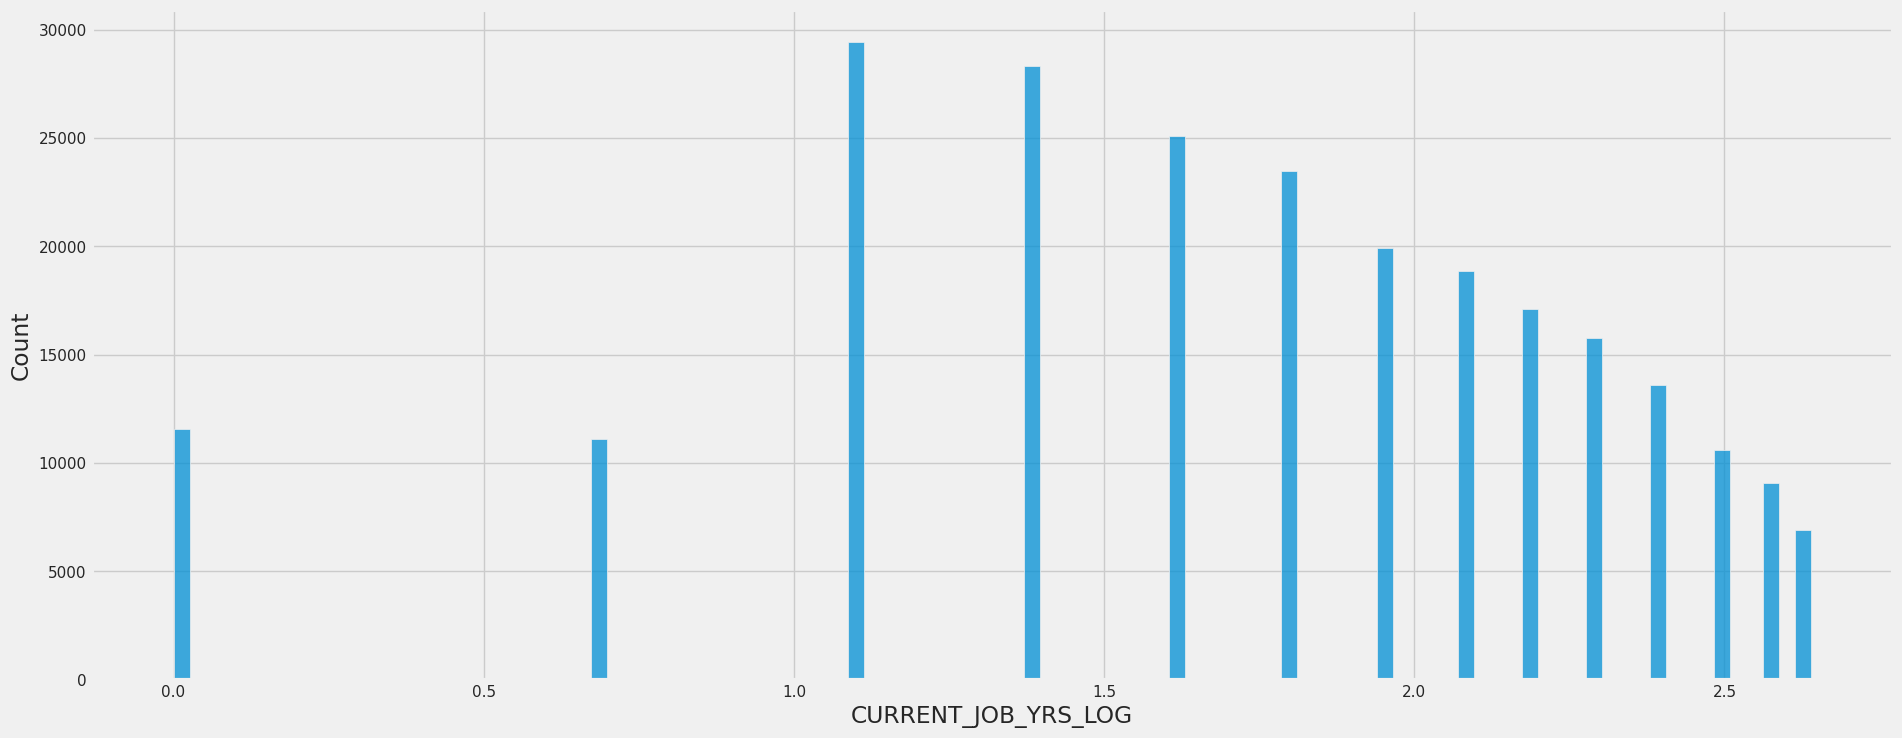

In [ ]:
sns.histplot(df['CURRENT_JOB_YRS_LOG'])

# Feature encoding

In [ ]:
mapping_Car_Ownership = {
    'yes' : 1,
    'no' : 0
}

df['Car_Ownership'] = df['Car_Ownership'].map(mapping_Car_Ownership)


In [ ]:
mapping_Married_Single = {
    'married' : 1,
    'single' : 0
}

df['Married/Single'] = df['Married/Single'].map(mapping_Married_Single)



In [ ]:
mapping_House_Ownership = {
    'rented' : 1,
    'owned' : 2,
    'norent_noown' : 0
}

df['House_Ownership'] = df['House_Ownership'].map(mapping_House_Ownership)



In [ ]:
df.head()

Id   Income  Age  Experience  Married/Single  House_Ownership  \
0  1  1303834   23           3               0                1   
1  2  7574516   40          10               0                1   
2  3  3991815   66           4               1                1   
3  4  6256451   41           2               0                1   
4  5  5768871   47          11               0                1   

   Car_Ownership           Profession                 CITY           STATE  \
0              0  Mechanical_engineer                 Rewa  Madhya_Pradesh   
1              0   Software_Developer             Parbhani     Maharashtra   
2              0     Technical_writer            Alappuzha          Kerala   
3              1   Software_Developer          Bhubaneswar          Odisha   
4              0        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu   

   CURRENT_JOB_YRS  CURRENT_HOUSE_YRS Risk_Flag   group_income group_age  \
0                3                 13         0     Low Income    Remaja   
1                9                 13         0    High Income    Dewasa   
2                4                 10         0  Medium Income    Manula   
3                2                 12         1  Medium Income    Dewasa   
4                3                 14         1  Medium Income    Lansia   

   income_value  house_value  car_value  net_worth  CURRENT_JOB_YRS_LOG  
0             1            2          0          3             1.098612  
1             3            2          0          5             2.197225  
2             2            2          0          4             1.386294  
3             2            2          1          5             0.693147  
4             2            2          0          4             1.098612

# Handle class imbalance

kalau dari mas Dedi pakai data sintetik

In [ ]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Id                   252000 non-null  object  
 1   Income               252000 non-null  int64   
 2   Age                  252000 non-null  int64   
 3   Experience           252000 non-null  int64   
 4   Married/Single       252000 non-null  int64   
 5   House_Ownership      252000 non-null  int64   
 6   Car_Ownership        252000 non-null  int64   
 7   Profession           252000 non-null  object  
 8   CITY                 252000 non-null  object  
 9   STATE                252000 non-null  object  
 10  CURRENT_JOB_YRS      252000 non-null  int64   
 11  CURRENT_HOUSE_YRS    252000 non-null  int64   
 12  Risk_Flag            252000 non-null  object  
 13  group_income         252000 non-null  category
 14  group_age            252000 non-null  category
 15  

In [ ]:
df['Risk_Flag'] = df['Risk_Flag'].astype('int')

In [ ]:
from imblearn import under_sampling, over_sampling

X = df.drop(columns=['Risk_Flag','CITY','STATE','Id','Profession','group_income','group_age','income_value', 'house_value', 'car_value', 'net_worth','CURRENT_JOB_YRS_LOG'], axis=1)
y = df['Risk_Flag']

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [ ]:
#coba ditambahkan secara data sintetik.

In [ ]:
X_over_SMOTE

Income  Age  Experience  Married/Single  House_Ownership  \
0       1303834   23           3               0                1   
1       7574516   40          10               0                1   
2       3991815   66           4               1                1   
3       6256451   41           2               0                1   
4       5768871   47          11               0                1   
...         ...  ...         ...             ...              ...   
442003  3512152   35           3               0                0   
442004  5449844   53          10               0                1   
442005  8196860   37          16               0                0   
442006  5671193   30          20               0                1   
442007  2755203   64          15               0                1   

        Car_Ownership  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  
0                   0                3                 13  
1                   0                9                 13  
2                   0                4                 10  
3                   1                2                 12  
4                   0                3                 14  
...               ...              ...                ...  
442003              1                3                 13  
442004              0                3                 12  
442005              0               11                 10  
442006              0               11                 14  
442007              0               11                 12  

[442008 rows x 8 columns]

In [ ]:
y_over_SMOTE.value_counts()

Risk_Flag
0    221004
1    221004
Name: count, dtype: int64

# Feature selection

## Semua fitur digunakan untuk modelling karena nilai pada masing-masing korelasi dengan label masih < 0.75 dan dianggap tidak redundant karena semua feature relevan

# Feature extraction

In [ ]:
df

Id   Income  Age  Experience  Married/Single  House_Ownership  \
0            1  1303834   23           3               0                1   
1            2  7574516   40          10               0                1   
2            3  3991815   66           4               1                1   
3            4  6256451   41           2               0                1   
4            5  5768871   47          11               0                1   
...        ...      ...  ...         ...             ...              ...   
251995  251996  8154883   43          13               0                1   
251996  251997  2843572   26          10               0                1   
251997  251998  4522448   46           7               0                1   
251998  251999  6507128   45           0               0                1   
251999  252000  9070230   70          17               0                1   

        Car_Ownership           Profession                 CITY  \
0                   0  Mechanical_engineer                 Rewa   
1                   0   Software_Developer             Parbhani   
2                   0     Technical_writer            Alappuzha   
3                   1   Software_Developer          Bhubaneswar   
4                   0        Civil_servant  Tiruchirappalli[10]   
...               ...                  ...                  ...   
251995              0              Surgeon              Kolkata   
251996              0         Army_officer                 Rewa   
251997              0      Design_Engineer      Kalyan-Dombivli   
251998              0     Graphic_Designer          Pondicherry   
251999              0         Statistician                Avadi   

                 STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  \
0       Madhya_Pradesh                3                 13          0   
1          Maharashtra                9                 13          0   
2               Kerala                4                 10          0   
3               Odisha                2                 12          1   
4           Tamil_Nadu                3                 14          1   
...                ...              ...                ...        ...   
251995     West_Bengal                6                 11          0   
251996  Madhya_Pradesh                6                 11          0   
251997     Maharashtra                7                 12          0   
251998      Puducherry                0                 10          0   
251999      Tamil_Nadu                7                 11          0   

         group_income group_age  income_value  house_value  car_value  \
0          Low Income    Remaja             1            2          0   
1         High Income    Dewasa             3            2          0   
2       Medium Income    Manula             2            2          0   
3       Medium Income    Dewasa             2            2          1   
4       Medium Income    Lansia             2            2          0   
...               ...       ...           ...          ...        ...   
251995    High Income    Dewasa             3            2          0   
251996     Low Income    Dewasa             1            2          0   
251997  Medium Income    Lansia             2            2          0   
251998  Medium Income    Dewasa             2            2          0   
251999    High Income    Manula             3            2          0   

        net_worth  CURRENT_JOB_YRS_LOG  
0               3             1.098612  
1               5             2.197225  
2               4             1.386294  
3               5             0.693147  
4               4             1.098612  
...           ...                  ...  
251995          5             1.791759  
251996          3             1.791759  
251997          4             1.945910  
251998          4                 -inf  
251999          5             1.945910  

[252000 rows x 20 columns]

In [ ]:
df['group_age'] = pd.cut(df['Age'], bins=[20, 25, 45, 65, float('inf')], labels=['Remaja', 'Dewasa', 'Lansia', 'Manula'])
df['group_income'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])
#df['group_job_yrs'] = pd.cut(df['CURRENT_JOB_YRS'], bins=[-1, 1, 5, 10, float('inf')], labels=['Unemployee', 'Junior','Mid-Senior', 'Senior']) #tidak perlu harusnya, ganti nya sisa usia produktif

pension_age = 64 #berdasarkan UU 13 Tahun 2003,Bab 1 Pasal 1 Ayat 2
df['prod_yrs_left'] = pension_age - df['Age']
df['prod_yrs_left'] = df['prod_yrs_left'].apply(lambda x: x if x > 0 else 0)
#bisa buatkan sisa total produktif ->  usia - experience. oke gass

In [ ]:
df

Id   Income  Age  Experience  Married/Single  House_Ownership  \
0            1  1303834   23           3               0                1   
1            2  7574516   40          10               0                1   
2            3  3991815   66           4               1                1   
3            4  6256451   41           2               0                1   
4            5  5768871   47          11               0                1   
...        ...      ...  ...         ...             ...              ...   
251995  251996  8154883   43          13               0                1   
251996  251997  2843572   26          10               0                1   
251997  251998  4522448   46           7               0                1   
251998  251999  6507128   45           0               0                1   
251999  252000  9070230   70          17               0                1   

        Car_Ownership           Profession                 CITY  \
0                   0  Mechanical_engineer                 Rewa   
1                   0   Software_Developer             Parbhani   
2                   0     Technical_writer            Alappuzha   
3                   1   Software_Developer          Bhubaneswar   
4                   0        Civil_servant  Tiruchirappalli[10]   
...               ...                  ...                  ...   
251995              0              Surgeon              Kolkata   
251996              0         Army_officer                 Rewa   
251997              0      Design_Engineer      Kalyan-Dombivli   
251998              0     Graphic_Designer          Pondicherry   
251999              0         Statistician                Avadi   

                 STATE  ...  CURRENT_HOUSE_YRS  Risk_Flag  group_income  \
0       Madhya_Pradesh  ...                 13          0           Low   
1          Maharashtra  ...                 13          0          High   
2               Kerala  ...                 10          0        Medium   
3               Odisha  ...                 12          1        Medium   
4           Tamil_Nadu  ...                 14          1        Medium   
...                ...  ...                ...        ...           ...   
251995     West_Bengal  ...                 11          0          High   
251996  Madhya_Pradesh  ...                 11          0           Low   
251997     Maharashtra  ...                 12          0        Medium   
251998      Puducherry  ...                 10          0        Medium   
251999      Tamil_Nadu  ...                 11          0          High   

       group_age income_value  house_value  car_value  net_worth  \
0         Remaja            1            2          0          3   
1         Dewasa            3            2          0          5   
2         Manula            2            2          0          4   
3         Dewasa            2            2          1          5   
4         Lansia            2            2          0          4   
...          ...          ...          ...        ...        ...   
251995    Dewasa            3            2          0          5   
251996    Dewasa            1            2          0          3   
251997    Lansia            2            2          0          4   
251998    Dewasa            2            2          0          4   
251999    Manula            3            2          0          5   

        CURRENT_JOB_YRS_LOG  prod_yrs_left  
0                  1.098612             41  
1                  2.197225             24  
2                  1.386294              0  
3                  0.693147             23  
4                  1.098612             17  
...                     ...            ...  
251995             1.791759             21  
251996             1.791759             38  
251997             1.945910             18  
251998                 -inf             19  
251999             1.945910              0  

[252000 rows x 21 colum

# Modelling

# Standarisasi Data


In [ ]:
df_new = df.drop(columns=['Id', 'Profession', 'CITY', 'STATE','group_income','group_age','income_value', 'house_value', 'car_value', 'net_worth','CURRENT_JOB_YRS_LOG']).copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

for feature in df_new.columns:
  if feature != 'Risk_Flag':
    df_new[feature] = scale.fit_transform(df_new[[feature]].values.reshape(len(df_new), 1))[:, 0]

In [ ]:
from imblearn import under_sampling, over_sampling

X = df_new.drop(columns=['Risk_Flag'], axis=1)
y = df_new['Risk_Flag']

X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

## Split Data Train & Data Test (Split Training Data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size=0.3, random_state=42)

## Modelling Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))


    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

Evaluasi model

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.53
Accuracy (Train Set): 0.53
Precision (Test Set): 0.53
Precision (Train Set): 0.53
Recall (Test Set): 0.56
Recall (Train Set): 0.56
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.55
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.55
recall (crossval train): 0.5489105392312996
recall (crossval test): 0.5338922426546417


In [ ]:
logreg.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
logreg.predict_proba(X_test)

array([[0.59877377, 0.40122623],
       [0.51001998, 0.48998002],
       [0.52545823, 0.47454177],
       ...,
       [0.53901692, 0.46098308],
       [0.49743052, 0.50256948],
       [0.50743628, 0.49256372]])

Evaluasi model setelah hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.001, 0.025, 0.05]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.53
Accuracy (Train Set): 0.53
Precision (Test Set): 0.53
Precision (Train Set): 0.53
Recall (Test Set): 0.56
Recall (Train Set): 0.56
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.55
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.55
recall (crossval train): 0.5482373248674217
recall (crossval test): 0.533139741792086


## Modelling Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=42) # inisiasi object dengan nama rf
rf.fit(X_train, y_train) # fit model random forest classifier dari data train
eval_classification(rf)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.96
Precision (Test Set): 0.91
Precision (Train Set): 0.92
Recall (Test Set): 0.98
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.97
recall (crossval train): 0.9757763975222357
recall (crossval test): 0.8968075740111866


In [ ]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

NameError: name 'X_train_over' is not defined

## Model K-Nearest Neighbors (KNN)

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.93
Precision (Test Set): 0.87
Precision (Train Set): 0.89
Recall (Test Set): 0.97
Recall (Train Set): 0.98
F1-Score (Test Set): 0.92
F1-Score (Train Set): 0.93
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96
recall (crossval train): 0.9446749316589316
recall (crossval test): 0.8611075971841966


Evaluasi model setelah hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

algorithm = ['auto']
hyperparameters = dict(algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.93
Precision (Test Set): 0.87
Precision (Train Set): 0.89
Recall (Test Set): 0.97
Recall (Train Set): 0.98
F1-Score (Test Set): 0.92
F1-Score (Train Set): 0.93
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96
recall (crossval train): 0.9446749316589316
recall (crossval test): 0.8611075971841966


## Model Decision Tree

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.96
Precision (Test Set): 0.89
Precision (Train Set): 0.92
Recall (Test Set): 0.96
Recall (Train Set): 1.00
F1-Score (Test Set): 0.92
F1-Score (Train Set): 0.96
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.98
recall (crossval train): 0.9776970885062646
recall (crossval test): 0.8669804682392209


Evaluasi model setelah hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

# Feature Importance dari Hasil Evaluasi Model Terbaik

In [ ]:
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance


y_pred = knn.predict(X_test)
initial_recall = recall_score(y_test, y_pred)
print(f"Initial Recall: {initial_recall:.4f}")


result = permutation_importance(knn, X_test, y_test, scoring='recall', n_repeats=30, random_state=42)


importances = result.importances_mean
stds = result.importances_std


sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], xerr=stds[sorted_idx], align='center')
plt.yticks(range(len(importances)), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for KNN')
plt.tight_layout()
plt.show()

important_features = np.array(X.columns)[sorted_idx]
print("Fitur-fitur penting berdasarkan permutation importance:")
for feature, importance in zip(important_features, importances[sorted_idx]):
    print(f"{feature}: {importance:.4f}")

Initial Recall: 0.9720


# Terima Kasih 💪